In [1]:
# Nodes and travel times from the Mandl
travel_times = {
    (1, 2): 8,
    (2, 3): 2,
    (2, 4): 3,
    (2, 5): 6,
    (3, 6): 3,
    (4, 5): 4,
    (4, 6): 4,
    (4, 12): 10,
    (6, 8): 2,
    (6, 15): 3,
    (7, 10): 7,
    (7, 15): 2,
    (8, 10): 8,
    (8, 15): 2,
    (9, 15): 8,
    (10, 11): 5,
    (10, 13): 10,
    (10, 14): 8,
    (11, 12): 10,
    (11, 13): 5,
    (13, 14): 2
}
# Adding reverse travel times
for (start, end), time in list(travel_times.items()):
    travel_times[(end, start)] = time

# Demand data Mandl
demand = {
    (1, 2): 400, (1, 3): 200, (1, 4): 60, (1, 5): 80, (1, 6): 150, 
    (1, 7): 75, (1, 8): 75, (1, 9): 30, (1, 10): 160, (1, 11): 30, 
    (1, 12): 25, (1, 13): 35, (2, 1): 400, (2, 3): 50, (2, 4): 120, 
    (2, 5): 20, (2, 6): 180, (2, 7): 90, (2, 8): 90, (2, 9): 15, 
    (2, 10): 130, (2, 11): 20, (2, 12): 10, (2, 13): 10, (2, 14): 5, 
    (3, 1): 200, (3, 2): 50, (3, 4): 40, (3, 5): 60, (3, 6): 180, 
    (3, 7): 90, (3, 8): 90, (3, 9): 15, (3, 10): 45, (3, 11): 20, 
    (3, 12): 10, (3, 13): 10, (3, 14): 5, (4, 1): 60, (4, 2): 120, 
    (4, 3): 40, (4, 5): 50, (4, 6): 100, (4, 7): 50, (4, 8): 50, 
    (4, 9): 15, (4, 10): 240, (4, 11): 40, (4, 12): 25, (4, 13): 10, 
    (4, 14): 5, (5, 1): 80, (5, 2): 20, (5, 3): 60, (5, 4): 50, 
    (5, 6): 50, (5, 7): 25, (5, 8): 25, (5, 9): 10, (5, 10): 120, 
    (5, 11): 20, (5, 12): 15, (5, 13): 5, (6, 1): 150, (6, 2): 180, 
    (6, 3): 180, (6, 4): 100, (6, 5): 50, (6, 7): 100, (6, 8): 100, 
    (6, 9): 30, (6, 10): 880, (6, 11): 60, (6, 12): 15, (6, 13): 15, 
    (6, 14): 10, (7, 1): 75, (7, 2): 90, (7, 3): 90, (7, 4): 50, 
    (7, 5): 25, (7, 6): 100, (7, 8): 50, (7, 9): 15, (7, 10): 440, 
    (7, 11): 35, (7, 12): 10, (7, 13): 10, (7, 14): 5, (8, 1): 75, 
    (8, 2): 90, (8, 3): 90, (8, 4): 50, (8, 5): 25, (8, 6): 100, 
    (8, 7): 50, (8, 9): 15, (8, 10): 440, (8, 11): 35, (8, 12): 10, 
    (8, 13): 10, (8, 14): 5, (9, 1): 30, (9, 2): 15, (9, 3): 15, 
    (9, 4): 15, (9, 5): 10, (9, 6): 30, (9, 7): 15, (9, 8): 15, 
    (9, 10): 140, (9, 11): 20, (9, 12): 5, (10, 1): 160, (10, 2): 130, 
    (10, 3): 45, (10, 4): 240, (10, 5): 120, (10, 6): 880, (10, 7): 440, 
    (10, 8): 440, (10, 9): 140, (10, 11): 600, (10, 12): 250, 
    (10, 13): 500, (10, 14): 200, (11, 1): 30, (11, 2): 20, (11, 3): 20, 
    (11, 4): 40, (11, 5): 20, (11, 6): 60, (11, 7): 35, (11, 8): 35, 
    (11, 9): 20, (11, 10): 600, (11, 12): 75, (11, 13): 95, (11, 14): 15, 
    (12, 1): 25, (12, 2): 10, (12, 3): 10, (12, 4): 25, (12, 5): 15, 
    (12, 6): 15, (12, 7): 10, (12, 8): 10, (12, 9): 5, (12, 10): 250, 
    (12, 11): 75, (12, 13): 70, (13, 1): 35, (13, 2): 10, (13, 3): 10, 
    (13, 4): 10, (13, 5): 5, (13, 6): 15, (13, 7): 10, (13, 8): 10, 
    (13, 10): 500, (13, 11): 95, (13, 12): 70, (13, 14): 45, 
    (14, 2): 5, (14, 3): 5, (14, 4): 5, (14, 6): 10, (14, 7): 5, 
    (14, 8): 5, (14, 10): 200, (14, 11): 15, (14, 13): 45
}





In [2]:
import pandas as pd
import numpy as np
import time

# Convert the travel_times dictionary into a list of tuples
travel_times_list = [(start, end, time) for (start, end), time in travel_times.items()]

# Convert the demand dictionary into a list of tuples
demand_list = [(origin, destination, demand_value) for (origin, destination), demand_value in demand.items()]

# Create DataFrames from the lists
travel_times_df = pd.DataFrame(travel_times_list, columns=['From', 'To', 'TravelTime'])
demand_df = pd.DataFrame(demand_list, columns=['From', 'To', 'Demand'])

# Create pivot tables to reshape the DataFrames into matrix form
travel_times_pivot = travel_times_df.pivot(index='From', columns='To', values='TravelTime')
demand_pivot = demand_df.pivot_table(index='From', columns='To', values='Demand', aggfunc='sum')

# Replace NaN with 10000 for travel times and 0 for self-travel
travel_times_matrix = travel_times_pivot.fillna(10000).astype(int)
np.fill_diagonal(travel_times_matrix.values, 0)

# Replace NaN with 0 for demand
demand_matrix = demand_pivot.fillna(0).astype(int)

# Reindex to ensure all nodes are represented, even if there is no data for them
travel_times_matrix = travel_times_matrix.reindex(index=range(1, 16), columns=range(1, 16), fill_value=10000)
demand_matrix = demand_matrix.reindex(index=range(1, 16), columns=range(1, 16), fill_value=0)

# Setting the diagonal to 0 for travel times matrix
for i in range(1, 16):
    travel_times_matrix.at[i, i] = 0




In [3]:
travel_times_matrix


To,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
From,,,,,,,,,,,,,,,
1,0,8,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
2,8,0,2,3,6,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
3,10000,2,0,10000,10000,3,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,10000,3,10000,0,4,4,10000,10000,10000,10000,10000,10,10000,10000,10000
5,10000,6,10000,4,0,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
6,10000,10000,3,4,10000,0,10000,2,10000,10000,10000,10000,10000,10000,3
7,10000,10000,10000,10000,10000,10000,0,10000,10000,7,10000,10000,10000,10000,2
8,10000,10000,10000,10000,10000,2,10000,0,10000,8,10000,10000,10000,10000,2
9,10000,10000,10000,10000,10000,10000,10000,10000,0,10000,10000,10000,10000,10000,8


In [4]:
demand_matrix

To,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
From,,,,,,,,,,,,,,,
1,0,400,200,60,80,150,75,75,30,160,30,25,35,0,0
2,400,0,50,120,20,180,90,90,15,130,20,10,10,5,0
3,200,50,0,40,60,180,90,90,15,45,20,10,10,5,0
4,60,120,40,0,50,100,50,50,15,240,40,25,10,5,0
5,80,20,60,50,0,50,25,25,10,120,20,15,5,0,0
6,150,180,180,100,50,0,100,100,30,880,60,15,15,10,0
7,75,90,90,50,25,100,0,50,15,440,35,10,10,5,0
8,75,90,90,50,25,100,50,0,15,440,35,10,10,5,0
9,30,15,15,15,10,30,15,15,0,140,20,5,0,0,0


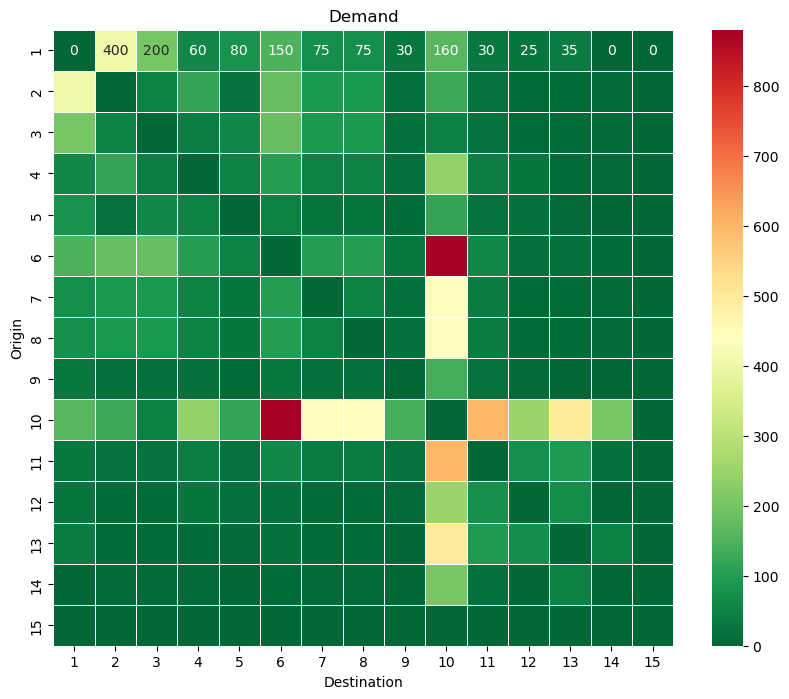

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(demand_matrix, cmap='RdYlGn_r', annot=True, fmt=".0f", linewidths=0.5)

# Customize the heatmap
plt.title('Demand')
plt.xlabel('Destination')
plt.ylabel('Origin')

# Show the heatmap
plt.show()

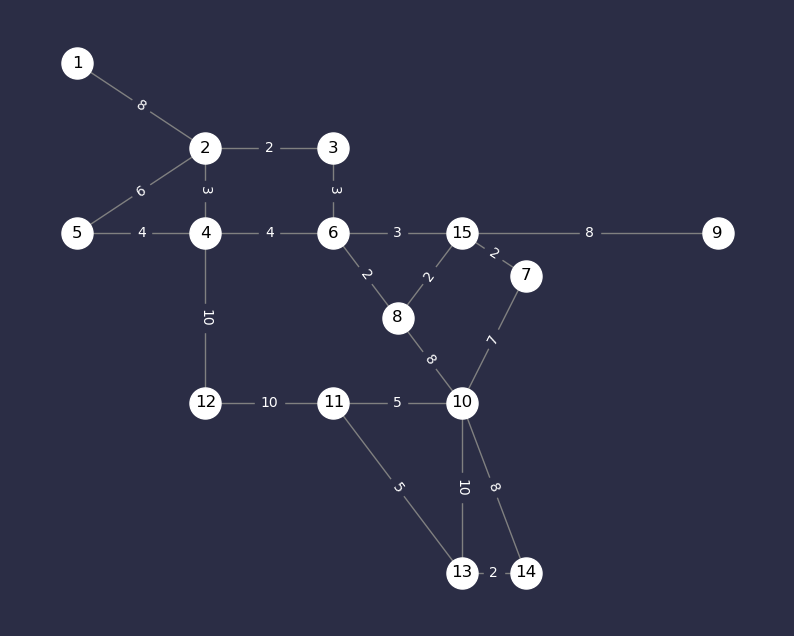

In [6]:

import networkx as nx
import pandas as pd
import itertools
G = nx.from_pandas_edgelist(travel_times_df, 'From', 'To', ['TravelTime'])
positions = {
    1: (1, 4),
    2: (2, 3),
    3: (3, 3),
    4: (2, 2),
    5: (1, 2),
    6: (3, 2),
    7: (4.5, 1.5),
    8: (3.5, 1),
    9: (6, 2),
    10: (4, 0),
    11: (3, 0),
    12: (2, 0),
    13: (4, -2),
    14: (4.5, -2),
    15: (4, 2)
}
fig, ax = plt.subplots(figsize=(10, 8))
background_color = "#2b2d45"

nx.draw(G, pos=positions, with_labels=True, node_size=500,node_color='white', edge_color='grey')

# Draw the edge labels (travel times)
edge_labels = nx.get_edge_attributes(G, 'TravelTime')
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels, font_color="white",ax=ax,bbox=dict(facecolor=background_color, edgecolor=background_color))



fig.set_facecolor(background_color)
plt.show()

In [7]:
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import pandas as pd

def draw_bus_routes(G, positions, bus_routes, demand_matrix):
    background_color = "#2b2d45"
    fig, ax = plt.subplots(figsize=(20, 14))
    fig.patch.set_facecolor(background_color)  # Set the outer background color
    ax.set_facecolor(background_color)  # Set the plotting area background color

    text_color = "white"
    # Calculate total demand for each node by summing across rows and columns (incoming and outgoing demand)
    demand_per_node = demand_matrix.sum(axis=0) + demand_matrix.sum(axis=1)
    
    # Normalize the demand to determine node sizes
    min_size = 400  # Set minimum size for the smallest nodes
    max_size = 2000  # Set maximum size for the largest nodes
    max_demand = demand_per_node.max()
    node_sizes = (demand_per_node / max_demand * (max_size - min_size) + min_size).tolist()

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos=positions, node_size=node_sizes, node_color=text_color, ax = ax)
    
    # Adjusted positions for grey edges
    adjusted_positions = {node: (pos[0] - 0.04, pos[1] - 0.04) for node, pos in positions.items()}

    # Draw the grey edges with adjusted positions
    nx.draw_networkx_edges(G, pos=adjusted_positions, edge_color='grey', width=1)
    nx.draw_networkx_labels(G, pos=positions, font_size=10, font_color=background_color)
    edge_labels = nx.get_edge_attributes(G, 'TravelTime')
    nx.draw_networkx_edge_labels(G, pos=adjusted_positions, edge_labels=edge_labels, font_color=text_color, bbox=dict(facecolor=background_color, edgecolor=background_color))

    colors = [
        "#e6194b",  # Bright Red
        "#3cb44b",  # Bright Green
        "#ffe119",  # Bright Yellow
        "#4363d8",  # Bright Blue
        "#f58231",  # Bright Orange
        "#911eb4",  # Purple
        "#46f0f0",  # Cyan
        "#f032e6",  # Magenta
        "#bcf60c",  # Lime
        "#fabebe",  # Pink
        "#008080",  # Teal
        "#e6beff",  # Lavender
        "#9a6324",  # Brown
        "#fffac8",  # Light Yellow
        "#800000",  # Maroon
        "#aaffc3",  # Mint Green
        "#808000",  # Olive
        "#ffd8b1",  # Coral
        "#000075",  # Navy Blue
        "#808080",  # Grey
    ]
    color_cycle = itertools.cycle(colors)  # Cycle through the colors

    # List to hold legend entries
    legend_handles = []

    # Starting offset values
    offset_x = 0.05  # Horizontal offset
    offset_y = 0.05  # Vertical offset

    # Iterate through each bus route
    for index, route in enumerate(bus_routes, start=1):
        # Create a list of edges from the route
        route_edges = [(route[n], route[n+1]) for n in range(len(route)-1)]
        
        # Get the next color from the cycle
        route_color = next(color_cycle)
        legend_handles.append(mpatches.Patch(color=route_color, label=f'Bus route {index}'))
        
        # Apply the current offset to the positions for this route
        route_positions = {node: (positions[node][0] + offset_x, positions[node][1] + offset_y) for node in route}

        # Draw the bus route on the graph
        nx.draw_networkx_edges(G, pos=route_positions, edgelist=route_edges, edge_color=route_color, width=2)

        # Increment the offset for the next route
        offset_x += 0.013
        offset_y += 0.013

    plt.legend(handles=legend_handles, loc='upper right', title='Bus Routes')
    plt.show()

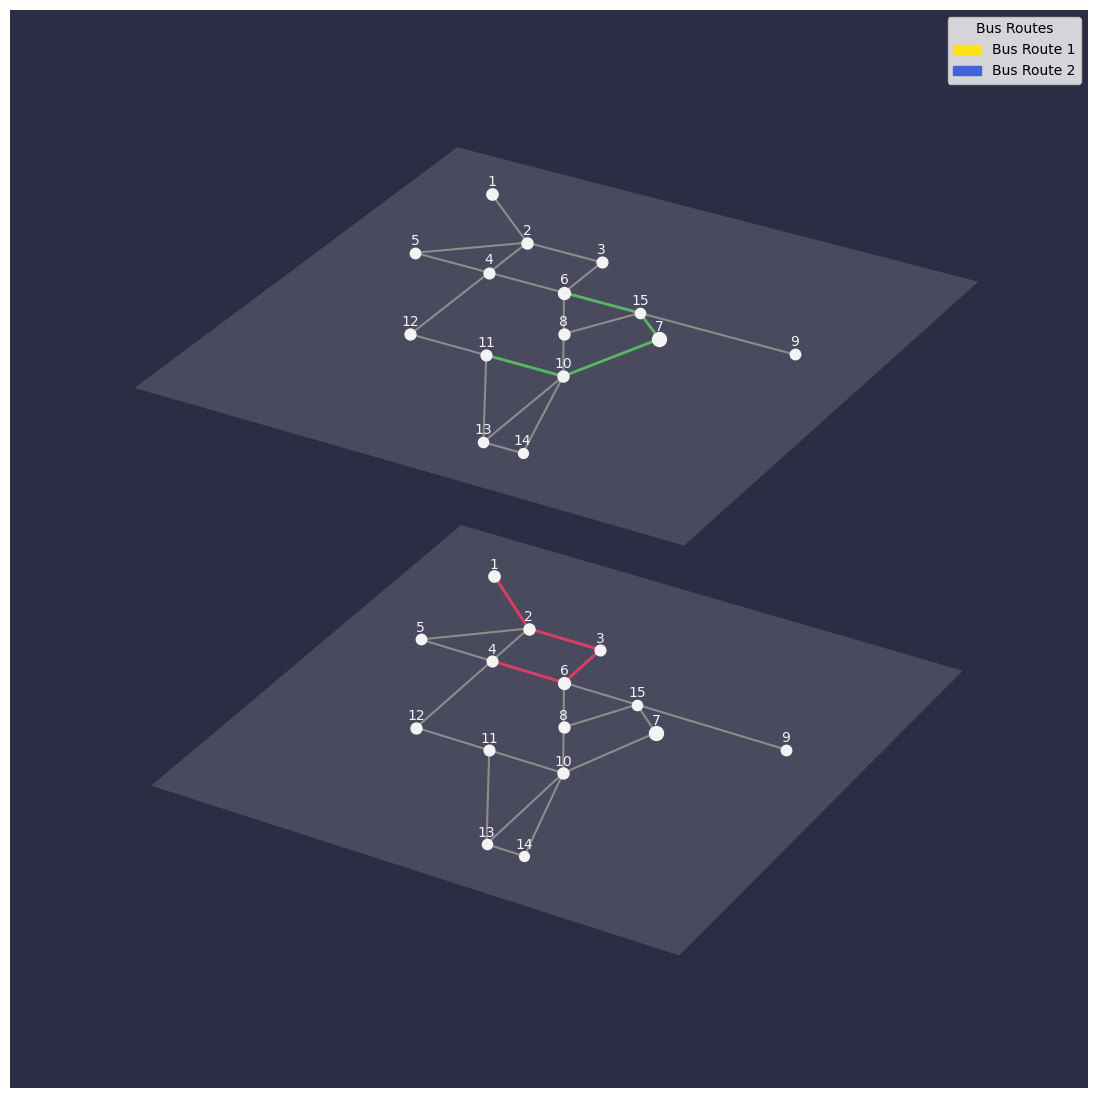

In [8]:
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np
colors = itertools.cycle([
    "#e6194b",  # Bright Red
    "#3cb44b",  # Bright Green
    "#ffe119",  # Bright Yellow
    "#4363d8",  # Bright Blue
    "#f58231",  # Bright Orange
    "#911eb4",  # Purple
    "#46f0f0",  # Cyan
    "#f032e6",  # Magenta
    "#bcf60c",  # Lime
    "#fabebe",  # Pink
    "#008080",  # Teal
    "#e6beff",  # Lavender
    "#9a6324",  # Brown
    "#fffac8",  # Light Yellow
    "#800000",  # Maroon
    "#aaffc3",  # Mint Green
    "#808000",  # Olive
    "#ffd8b1",  # Coral
    "#000075",  # Navy Blue
    "#808080",  # Grey
])
def draw_3d_bus_routes(G, positions, bus_routes, demand_matrix):
    fig = plt.figure(figsize=(20, 14))
    ax = fig.add_subplot(111, projection='3d')
    background_color = "#2b2d45"
    text_color = "white"
    ax.set_facecolor(background_color)

    # Calculate total demand for each node by summing across rows and columns (incoming and outgoing demand)
    demand_per_node = demand_matrix.sum(axis=0) + demand_matrix.sum(axis=1)
    
    # Normalize the demand to determine node sizes
    min_size = 50  # Set minimum size for the smallest nodes
    max_size = 100  # Set maximum size for the largest nodes
    max_demand = demand_per_node.max()
    node_sizes = (demand_per_node / max_demand * (max_size - min_size) + min_size).tolist()
    
    # Define the extent of the surface planes
    x_min, x_max = min(pos[0] for pos in positions.values()), max(pos[0] for pos in positions.values())
    y_min, y_max = min(pos[1] for pos in positions.values()), max(pos[1] for pos in positions.values())
    x = np.linspace(x_min-1, x_max+1, 2)
    y = np.linspace(y_min-1, y_max+1, 2)
    X, Y = np.meshgrid(x, y)
    
    # Draw the network nodes and edges for each layer
    z_layer = 0.1
    for route in bus_routes:
        # Draw a semi-transparent plane for this layer
        ax.plot_surface(X, Y, np.full(X.shape, z_layer), color="white", alpha=0.2)

        # Draw the nodes for this layer
        for node, size in zip(G.nodes, node_sizes):
            x, y = positions[node]
            ax.scatter(x, y, z_layer, s=size, c=text_color)
            ax.text(x, y, z_layer + 0.003, str(node), color='white', ha='center', va='center', fontsize=10)
        # Draw the edges for this layer
        for edge in G.edges():
            x1, y1 = positions[edge[0]]
            x2, y2 = positions[edge[1]]
            ax.plot([x1, x2], [y1, y2], [z_layer, z_layer], color='gray')

        z_layer += 0.1  # Increase the layer height for the next bus route

    # Draw bus routes on different levels
    for idx, route in enumerate(bus_routes, start=1):
        route_color = next(colors)
        # Create a list of edges from the route
        route_edges = [(route[n], route[n+1]) for n in range(len(route)-1)]
        for edge in route_edges:
            x1, y1 = positions[edge[0]]
            x2, y2 = positions[edge[1]]
            # Draw the bus route on the graph with an offset in the z direction
            ax.plot([x1, x2], [y1, y2], zs=[idx * 0.1], color=route_color, linewidth=2)

    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.set_axis_off()
    handles = [mpatches.Patch(color=next(colors), label=f'Bus Route {i+1}') for i in range(len(bus_routes))]
    ax.legend(handles=handles, loc='upper right', title='Bus Routes')

    plt.show()

# Example usage:
# G is your NetworkX graph
# positions is a dictionary with your node positions, e.g. {node: (x, y)}
# bus_routes is a list of routes, where each route is a list of nodes, e.g. [[1, 2, 3], [4, 5, 6]]
# demand_matrix is a pandas DataFrame representing your demand matrix
bus_routes= [[1, 2, 3, 6,4],
 [  6 ,15, 7, 10, 11]]
draw_3d_bus_routes(G, positions, bus_routes, demand_matrix)


In [9]:
def draw_bus_routes_frame(G, positions, bus_routes, demand_matrix, ax):
    background_color = "white"
    text_color = "black"
    #ax.set_facecolor(background_color)
    # Calculate total demand for each node by summing across rows and columns (incoming and outgoing demand)
    demand_per_node = demand_matrix.sum(axis=0) + demand_matrix.sum(axis=1)
    
    # Normalize the demand to determine node sizes
    min_size = 300  # Set minimum size for the smallest nodes
    max_size = 300  # Set maximum size for the largest nodes
    max_demand = demand_per_node.max()
    node_sizes = (demand_per_node / max_demand * (max_size - min_size) + min_size).tolist()

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos=positions, node_size=node_sizes, node_color=text_color, ax=ax)
    
    # Adjusted positions for grey edges
    adjusted_positions = {node: (pos[0] - 0.04, pos[1] - 0.04) for node, pos in positions.items()}

    # Draw the grey edges with adjusted positions
    nx.draw_networkx_edges(G, pos=adjusted_positions, edge_color='grey', width=1, ax=ax)
    nx.draw_networkx_labels(G, pos=positions, font_size=10, font_color=background_color, ax=ax)
    edge_labels = nx.get_edge_attributes(G, 'TravelTime')
    nx.draw_networkx_edge_labels(G, pos=adjusted_positions, edge_labels=edge_labels, font_color=text_color, bbox=dict(facecolor=background_color, edgecolor=background_color), ax=ax)

    colors = [
        "#e6194b",  # Bright Red
        "#3cb44b",  # Bright Green
        "#ffe119",  # Bright Yellow
        "#4363d8",  # Bright Blue
        "#f58231",  # Bright Orange
        "#911eb4",  # Purple
        "#46f0f0",  # Cyan
        "#f032e6",  # Magenta
        "#bcf60c",  # Lime
        "#fabebe",  # Pink
        "#008080",  # Teal
        "#e6beff",  # Lavender
        "#9a6324",  # Brown
        "#fffac8",  # Light Yellow
        "#800000",  # Maroon
        "#aaffc3",  # Mint Green
        "#808000",  # Olive
        "#ffd8b1",  # Coral
        "#000075",  # Navy Blue
        "#808080",  # Grey
    ]
    color_cycle = itertools.cycle(colors)  # Cycle through the colors

    # List to hold legend entries
    legend_handles = []

    # Starting offset values
    offset_x = 0.05  # Horizontal offset
    offset_y = 0.05  # Vertical offset

    # Iterate through each bus route
    for index, route in enumerate(bus_routes, start=1):
        # Create a list of edges from the route
        route_edges = [(route[n], route[n+1]) for n in range(len(route)-1)]
        
        # Get the next color from the cycle
        route_color = next(color_cycle)
        legend_handles.append(mpatches.Patch(color=route_color, label=f'Bus route {index}'))
        
        # Apply the current offset to the positions for this route
        route_positions = {node: (positions[node][0] + offset_x, positions[node][1] + offset_y) for node in route}

        # Draw the bus route on the graph
        nx.draw_networkx_edges(G, pos=route_positions, edgelist=route_edges, edge_color=route_color, width=2, ax=ax)

        # Increment the offset for the next route
        offset_x += 0.013
        offset_y += 0.013

    plt.legend(handles=legend_handles, loc='upper right', title='Bus Routes')
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import ast

def safe_literal_eval(string):
    try:
        return ast.literal_eval(string)
    except (SyntaxError, ValueError):
        return []

def draw_bus_routes_animation(G, positions, df, demand_matrix):
    fig, ax = plt.subplots(figsize=(14, 10))

    def update(frame_num):
        ax.clear()
        bus_routes = safe_literal_eval(df.iloc[frame_num]['Routes'])
        # Pass ax to the function
        draw_bus_routes_frame(G, positions, bus_routes, demand_matrix, ax)
        ax.set_title(f'Generation {df.iloc[frame_num]["Generation"]}')
        # Subtitles with different scores
        ax.text(0.5, -0.05, f'Best Operator Score: {df.iloc[frame_num]["Best CO"]}',
                ha='center', va='center', transform=ax.transAxes)
        ax.text(0.5, -0.1, f'Best Passenger Score: {df.iloc[frame_num]["Best CP"]:.2f}',
                ha='center', va='center', transform=ax.transAxes)


    ani = FuncAnimation(fig, update, frames=len(df), repeat=False)

    # Save the animation to a GIF file
    ani.save('bus_routes_animation.gif', writer='imagemagick', fps=10)

    return ani


In [10]:

bus_routes = [
    [1, 2, 3, 4, 5],               # Bus route 1
    [6, 7, 8, 9, 10, 11],          # Bus route 2
    [12, 13, 14, 15, 1, 2],        # Bus route 3
    [3, 4, 5, 6, 7, 8, 9],         # Bus route 4
    [10, 11, 12, 13, 14, 15, 1],   # Bus route 5
    [2, 3, 4, 5, 6, 7, 8]          # Bus route 6
]

bus_routes

[[1, 2, 3, 4, 5],
 [6, 7, 8, 9, 10, 11],
 [12, 13, 14, 15, 1, 2],
 [3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 1],
 [2, 3, 4, 5, 6, 7, 8]]

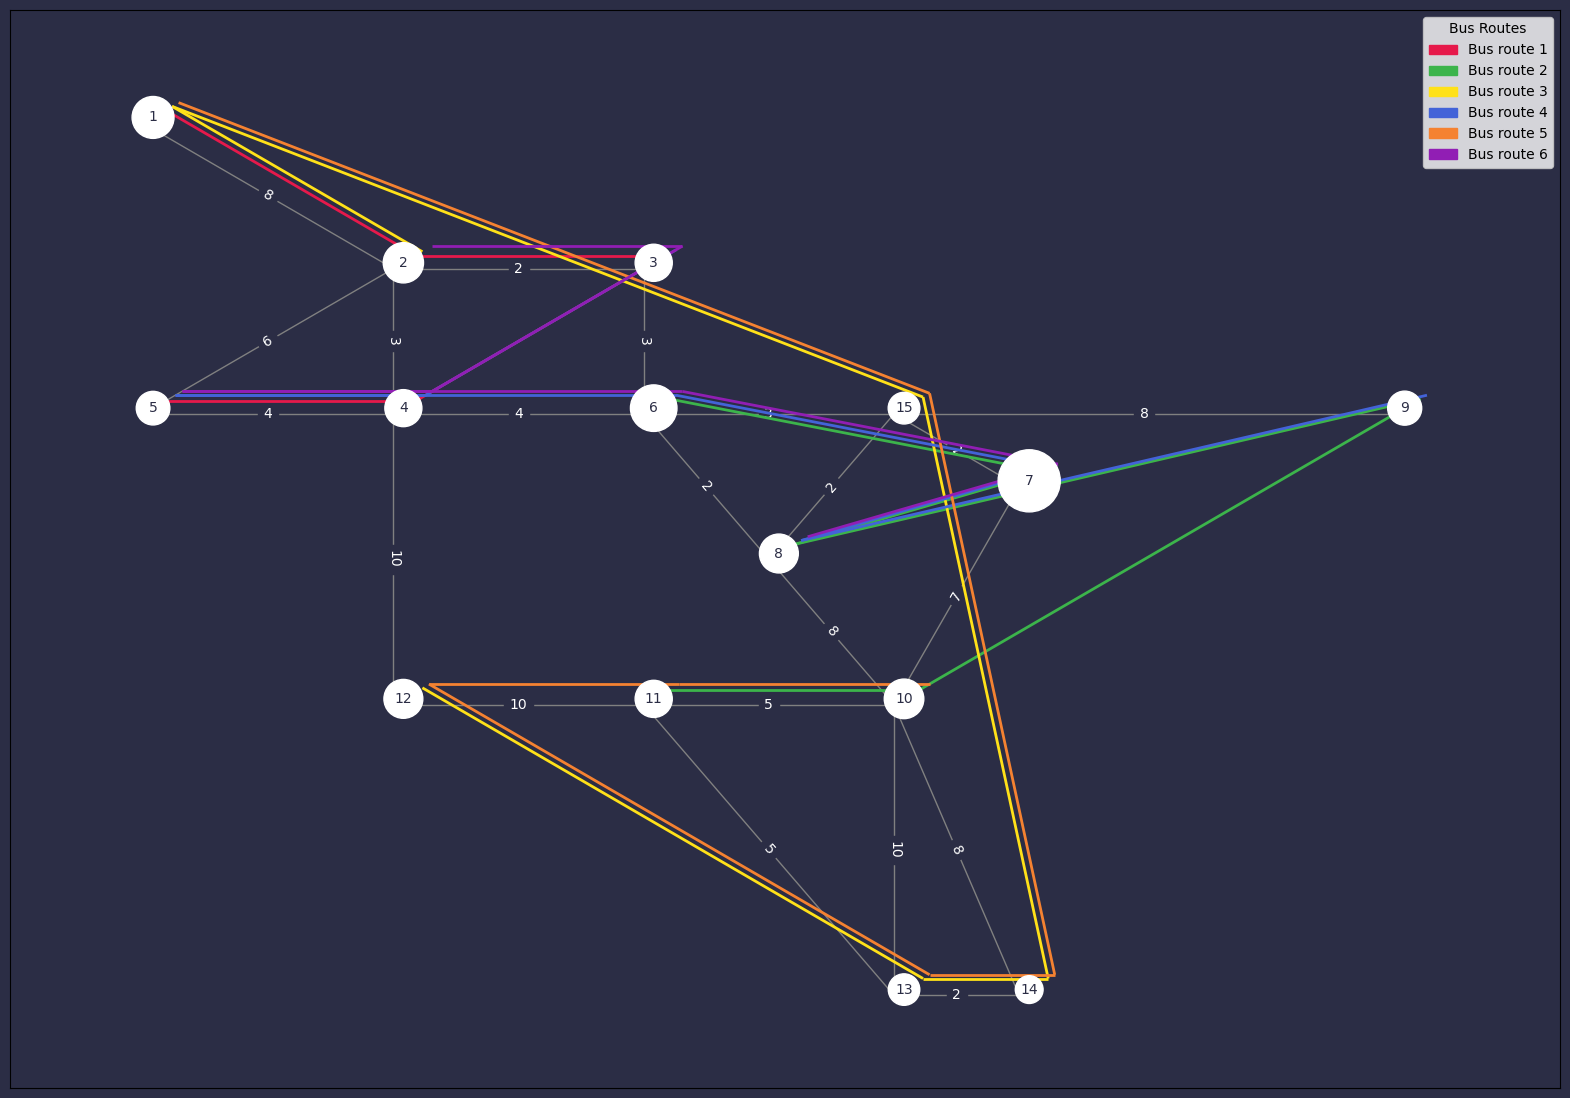

In [11]:
draw_bus_routes(G, positions, bus_routes, demand_matrix)

In [12]:
import networkx as nx

def validate_and_modify_routes(G, bus_routes):
    valid_routes = []
    for route in bus_routes:
        valid_route = [route[0]]  # Start with the first stop
        for i in range(1, len(route)):
            if G.has_edge(valid_route[-1], route[i]):
                valid_route.append(route[i])
            else:
                # Find the shortest path between the two stops
                try:
                    path = nx.shortest_path(G, valid_route[-1], route[i])
                    # Exclude the first node to avoid duplication
                    valid_route.extend(path[1:])
                except nx.NetworkXNoPath:
                    print(f"No path found between {valid_route[-1]} and {route[i]}")
                    # Handle the case where no path is found
                    # For now, we just break the current route
                    break
        valid_routes.append(valid_route)
    return valid_routes

# Validate and modify the bus routes
validated_bus_routes = validate_and_modify_routes(G, bus_routes)

In [13]:
validated_bus_routes

[[1, 2, 3, 2, 4, 5],
 [6, 15, 7, 10, 8, 15, 9, 15, 7, 10, 11],
 [12, 11, 13, 14, 10, 7, 15, 6, 3, 2, 1, 2],
 [3, 2, 4, 5, 4, 6, 15, 7, 10, 8, 15, 9],
 [10, 11, 12, 11, 13, 14, 10, 7, 15, 6, 3, 2, 1],
 [2, 3, 2, 4, 5, 4, 6, 15, 7, 10, 8]]

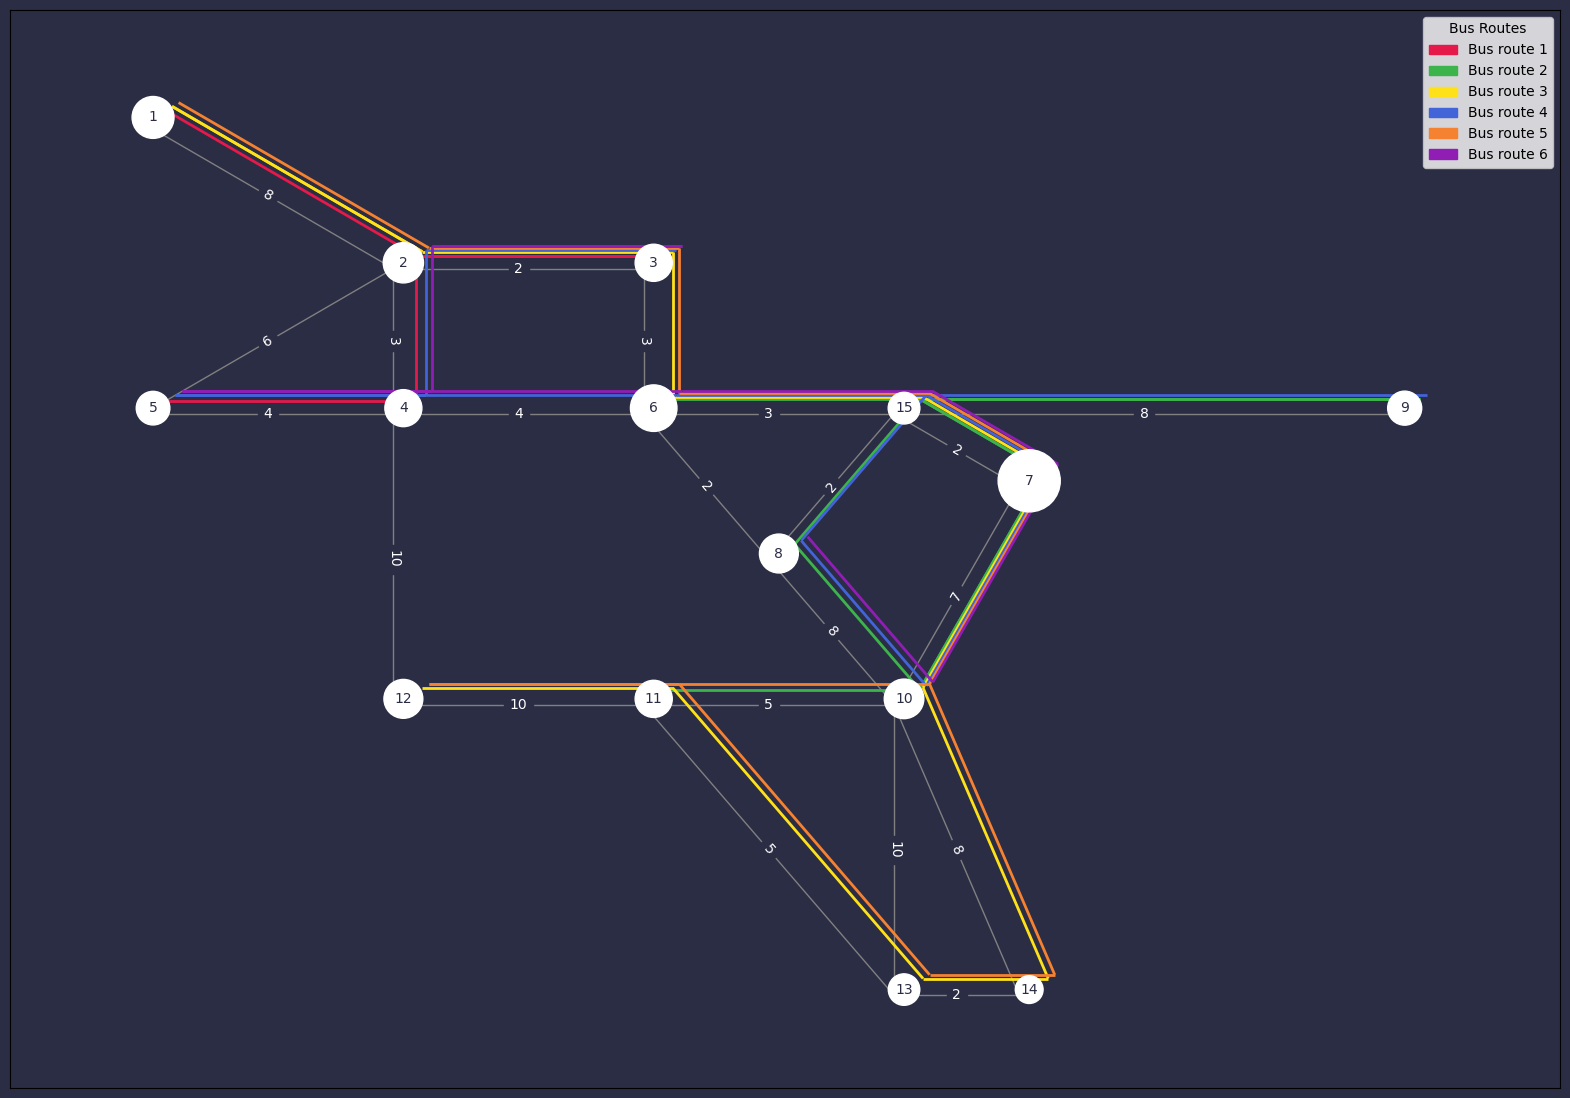

In [14]:
draw_bus_routes(G, positions, validated_bus_routes, demand_matrix)

In [15]:
import networkx as nx
import heapq
def reconstruct_path(previous_nodes, end_node):
    # Initialize the detailed path
    detailed_path = []

    # Trace back from the end node to the start node
    current_node = end_node
    while current_node in previous_nodes:
        prev_node = previous_nodes[current_node]
        if prev_node is None:
            # If we've reached the start node, break the loop
            detailed_path.insert(0, current_node)
            break
        # Add the current node to the path
        detailed_path.insert(0, current_node)
        current_node = prev_node

    return detailed_path




def create_graph(travel_times, bus_routes):
    graph = {}
    # Adding edges for each bus route
    for route_index, route in enumerate(bus_routes):
        for i in range(len(route)-1):
            for j in range(i+1, len(route)):
                stop1, stop2 = route[i], route[j]
                # Calculate the travel time between stops
                time = sum(travel_times.get((min(route[k], route[k+1]), max(route[k], route[k+1])), 0) for k in range(i, j))
                # Add edge in both directions for the same bus route
                graph[(stop1, route_index)] = graph.get((stop1, route_index), []) + [(time, (stop2, route_index))]
                graph[(stop2, route_index)] = graph.get((stop2, route_index), []) + [(time, (stop1, route_index))]

    # Adding penalty edges for changing buses
    for stop in set(sum(bus_routes, [])):
        bus_indices = [i for i, route in enumerate(bus_routes) if stop in route]
        for i in bus_indices:
            for j in bus_indices:
                if i != j:
                    graph[(stop, i)] = graph.get((stop, i), []) + [(5, (stop, j))] # Penalty for changing buses

    return graph

def dijkstra(graph, start_stop, end_stop):
    queue = []
    distances = {}
    previous_nodes = {}

    # Initialize the queue and distances for all starting points on different routes
    for start_node in graph:
        if start_node[0] == start_stop:
            heapq.heappush(queue, (0, start_node))
            distances[start_node] = 0
            previous_nodes[start_node] = None

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        if current_node[0] == end_stop:
            # Return the complete path data along with the distance
            return distances[current_node], current_node, previous_nodes

        for edge_distance, neighbor in graph.get(current_node, []):
            distance = current_distance + edge_distance
            if distance < distances.get(neighbor, float('inf')):
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return float('inf'), None, {}  # Return infinity and empty path if no path is found



# Run the function to find the shortest path with complete details
shortest_distance, end_node, previous_nodes = dijkstra(create_graph(travel_times, validated_bus_routes), 4, 12)

# Run the path reconstruction with the updated data
reconstructed_path = reconstruct_path(previous_nodes, end_node)
shortest_distance, reconstructed_path






(36, [(4, 3), (6, 3), (6, 4), (10, 4), (12, 4)])

In [16]:
validated_bus_routes

[[1, 2, 3, 2, 4, 5],
 [6, 15, 7, 10, 8, 15, 9, 15, 7, 10, 11],
 [12, 11, 13, 14, 10, 7, 15, 6, 3, 2, 1, 2],
 [3, 2, 4, 5, 4, 6, 15, 7, 10, 8, 15, 9],
 [10, 11, 12, 11, 13, 14, 10, 7, 15, 6, 3, 2, 1],
 [2, 3, 2, 4, 5, 4, 6, 15, 7, 10, 8]]

In [17]:
import pandas as pd

def calculate_travel_times(bus_routes, travel_times):
    graph = create_graph(travel_times, bus_routes)
    all_paths = {}

    # Extract all unique stops from the keys of the travel_times dictionary
    all_stops = sorted(set(sum([list(pair) for pair in travel_times.keys()], [])))

    # Initialize an empty dataframe with all stops as both columns and index
    od_matrix = pd.DataFrame(index=all_stops, columns=all_stops, data=float('inf'))

    for start in all_stops:  # Iterate over each unique stop
        for end in all_stops:
            if start != end:
                # Get the shortest path from 'start' to 'end'
                shortest_distance, end_node, previous_nodes = dijkstra(graph, start, end)

                # If no path is found (distance is 'inf'), set it to a Schablon
                if shortest_distance == float('inf'):
                    shortest_distance = 100

                # Reconstruct the path from 'start' to 'end'
                reconstructed_path = reconstruct_path(previous_nodes, end_node)

                # Store the shortest distance and path
                all_paths[(start, end)] = (shortest_distance, reconstructed_path)

                # Update the OD matrix with the shortest distance or 50 if no path is found
                od_matrix.at[start, end] = shortest_distance

    return all_paths, od_matrix


In [18]:
# Display the OD matrix dataframe
start_time = time.time()
all_paths, od_matrix_df = calculate_travel_times(validated_bus_routes, travel_times)
end_time = time.time()

od_matrix_df.head(15)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,inf,8.0,10.0,11.0,15.0,13.0,18.0,23.0,29.0,25.0,30.0,40.0,35.0,33.0,16.0
2,8.0,inf,2.0,3.0,7.0,5.0,10.0,12.0,18.0,17.0,22.0,32.0,27.0,25.0,8.0
3,10.0,2.0,inf,5.0,9.0,3.0,8.0,13.0,19.0,15.0,20.0,30.0,25.0,23.0,6.0
4,11.0,3.0,5.0,inf,4.0,4.0,9.0,9.0,15.0,16.0,26.0,36.0,31.0,29.0,7.0
5,15.0,7.0,9.0,4.0,inf,8.0,13.0,13.0,19.0,20.0,30.0,40.0,35.0,33.0,11.0
6,13.0,5.0,3.0,4.0,8.0,inf,5.0,5.0,11.0,12.0,17.0,27.0,22.0,20.0,3.0
7,18.0,10.0,8.0,9.0,13.0,5.0,inf,4.0,10.0,7.0,12.0,22.0,17.0,15.0,2.0
8,23.0,12.0,13.0,9.0,13.0,5.0,4.0,inf,10.0,8.0,13.0,28.0,23.0,21.0,2.0
9,29.0,18.0,19.0,15.0,19.0,11.0,10.0,10.0,inf,17.0,22.0,37.0,32.0,30.0,8.0
10,25.0,17.0,15.0,16.0,20.0,12.0,7.0,8.0,17.0,inf,5.0,15.0,10.0,8.0,9.0


In [19]:
print(end_time - start_time)


0.07796025276184082


In [20]:
import numpy as np
import random

def generate_bus_routes(travel_times_matrix, num_buses, num_stops_per_bus):
    """
    Generate bus routes based on a travel times matrix.
    
    :param travel_times_matrix: A 2D numpy array where each element represents travel time between stops.
                                A value of 10000 indicates no direct route.
    :param num_buses: The number of bus routes to generate.
    :param num_stops_per_bus: The number of stops per bus route.
    :return: A list of bus routes, each route is a list of stop numbers.
    """
    # Ensure we're working with a numpy array
    if isinstance(travel_times_matrix, pd.DataFrame):
        travel_times_matrix = travel_times_matrix.values
    
    num_stops = travel_times_matrix.shape[0]  # Total number of stops
    bus_routes = []  # List to hold all bus routes
    
    for _ in range(num_buses):
        route = []
        visited_stops = set()
        current_stop = random.randint(0, num_stops-1)  # Choose a random stop to start
        
        while len(route) < num_stops_per_bus:
            route.append(current_stop + 1)  # Add current stop to route (1-indexed)
            visited_stops.add(current_stop)
            
            # Get indices of possible next stops (non-10000 and not visited)
            possible_next_stops = np.where(travel_times_matrix[current_stop] != 10000)[0]
            next_stops = [stop for stop in possible_next_stops if stop not in visited_stops]
            
            if next_stops:
                # Randomly choose the next stop from the unvisited ones
                current_stop = random.choice(next_stops)
            else:
                # If there are no unvisited stops available, break the loop
                break
    
        
        bus_routes.append(route)
    return bus_routes



C:\Users\jespe\AppData\Local\Temp\ipykernel_13512\3425371719.py:79: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos=route_positions, edgelist=route_edges, edge_color=route_color, width=2)


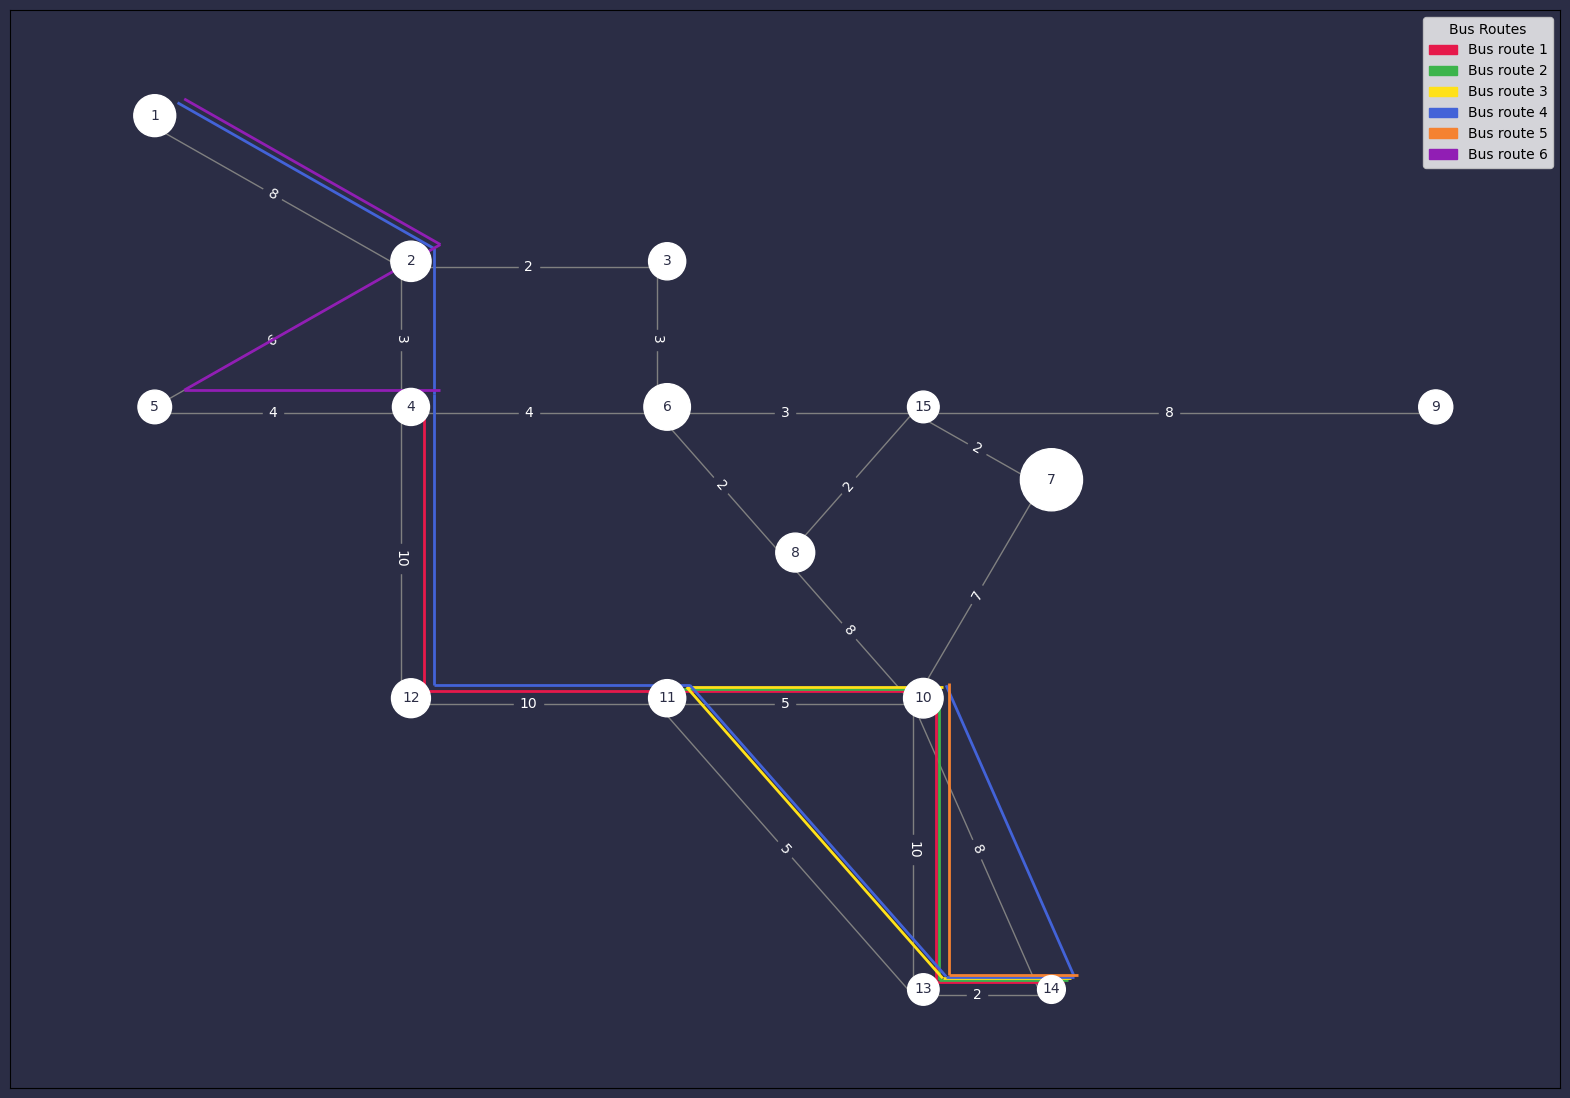

In [21]:
bus_routes=generate_bus_routes(travel_times_matrix,6,10)
draw_bus_routes(G, positions, bus_routes, demand_matrix)

In [22]:
bus_routes

[[4, 12, 11, 10, 13, 14],
 [11, 10, 13, 14],
 [10, 11, 13, 14],
 [10, 14, 13, 11, 12, 4, 2, 1],
 [10, 13, 14],
 [4, 5, 2, 1]]

In [23]:
all_paths, od_matrix_df = calculate_travel_times(bus_routes, travel_times)
od_matrix_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,inf,8.0,100.0,11.0,14.0,100.0,100.0,100.0,100.0,41.0,31.0,21.0,36.0,38.0,100.0
2,8.0,inf,100.0,3.0,6.0,100.0,100.0,100.0,100.0,33.0,23.0,13.0,28.0,30.0,100.0
3,100.0,100.0,inf,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,11.0,3.0,100.0,inf,4.0,100.0,100.0,100.0,100.0,25.0,20.0,10.0,25.0,27.0,100.0
5,14.0,6.0,100.0,4.0,inf,100.0,100.0,100.0,100.0,34.0,29.0,19.0,34.0,36.0,100.0
6,100.0,100.0,100.0,100.0,100.0,inf,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
7,100.0,100.0,100.0,100.0,100.0,100.0,inf,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
8,100.0,100.0,100.0,100.0,100.0,100.0,100.0,inf,100.0,100.0,100.0,100.0,100.0,100.0,100.0
9,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,inf,100.0,100.0,100.0,100.0,100.0,100.0
10,41.0,33.0,100.0,25.0,34.0,100.0,100.0,100.0,100.0,inf,5.0,15.0,10.0,8.0,100.0


In [24]:
def calculate_cp_score(travel_time_matrix, demand_matrix):
    """
    Calculate the CP score for a public transport network.
    
    Parameters:
    - travel_time_matrix: DataFrame, travel times with penalty included between all O-D pairs.
    - demand_matrix: DataFrame, demand between all O-D pairs.
    
    Returns:
    - CP_score: float, the calculated CP score of the network.
    """
    # Multiply travel times by demands for each O-D pair
    weighted_travel_times = travel_time_matrix * demand_matrix

    # Sum the weighted travel times for the entire network
    total_weighted_travel_time = weighted_travel_times.sum().sum()

    # Sum the total demands for the network
    total_demand = demand_matrix.sum().sum()

    # Calculate the CP score
    CP_score = total_weighted_travel_time / total_demand
    
    return CP_score
import networkx as nx

def calculate_co_score(routes, travel_time_matrix, print_time=False):
    G = nx.Graph()
    total_time = 0
    visited_stations = set()
    penalty = 0
    # Build the graph from the routes
    for route in routes:
        route_time = 0
        for i in range(len(route) - 1):
            from_node = route[i]
            to_node = route[i + 1]
            visited_stations.update([from_node, to_node])
            G.add_edge(from_node, to_node)
            
            travel_time = travel_time_matrix.loc[from_node, to_node]
            route_time += travel_time

            if print_time:
                print(f"Travel time from {from_node} to {to_node}: {travel_time}")
        
        total_time += route_time

    # Check if the network is fully connected
    all_stations = set(travel_time_matrix.columns)
    
    # Remove visited stations from the set of all stations to find unvisited ones
    unvisited_stations = all_stations - visited_stations
    #print(unvisited_stations)
    penalty += len(unvisited_stations) * 100
    if not nx.is_connected(G):
        # If not, apply a penalty
        penalty += 100
        
        if print_time:
            print(f"Penalty for unconnected network: {penalty}")
    total_time += penalty
    return total_time


def calculate_score(cp, co):
    #passanger cost - journey time (45:- per hour)
    #operator cost - distance*frequency*24h*cost per km
    return cp*15570/60*45 + co*6*24*6

# Test calculations

### Operator optimized

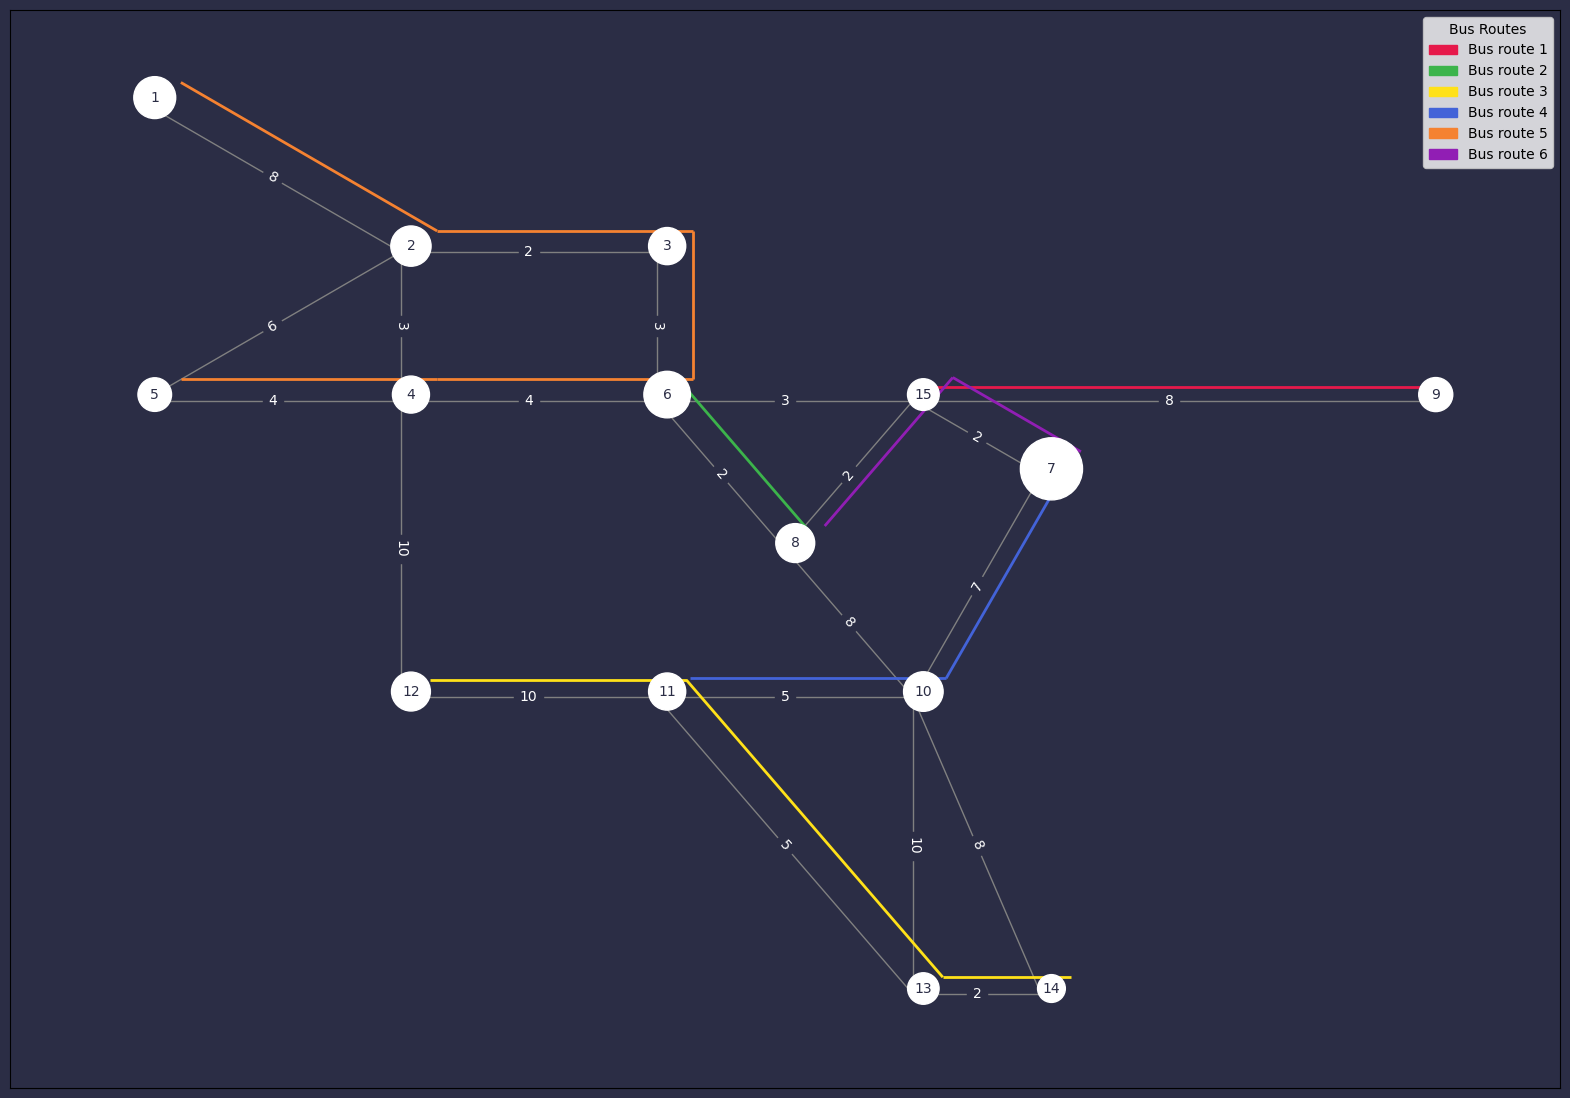

In [25]:
bus_routes = [
    [15, 9],    # Bus route 1
    [8, 6],      # Bus route 2
    [14, 13, 11, 12],    # Bus route 3
    [11, 10, 7],    # Bus route 4
    [5,4, 6, 3, 2, 1],  # Bus route 5
    [8, 15,7]       # Bus route 6
]

draw_bus_routes(G, positions, bus_routes, demand_matrix)

In [26]:
all_paths, od_matrix_df = calculate_travel_times(bus_routes, travel_times)
cp = calculate_cp_score(od_matrix_df,demand_matrix)
co = calculate_co_score(bus_routes,od_matrix_df)

print("Operaor cost:", co)
print("Passanger cost:", cp)

Operaor cost: 64.0
Passanger cost: 17.05266538214515


In [27]:
od_matrix_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,inf,8.0,10.0,17.0,21.0,13.0,29.0,20.0,40.0,41.0,46.0,61.0,56.0,58.0,27.0
2,8.0,inf,2.0,9.0,13.0,5.0,21.0,12.0,32.0,33.0,38.0,53.0,48.0,50.0,19.0
3,10.0,2.0,inf,7.0,11.0,3.0,19.0,10.0,30.0,31.0,36.0,51.0,46.0,48.0,17.0
4,17.0,9.0,7.0,inf,4.0,4.0,20.0,11.0,31.0,32.0,37.0,52.0,47.0,49.0,18.0
5,21.0,13.0,11.0,4.0,inf,8.0,24.0,15.0,35.0,36.0,41.0,56.0,51.0,53.0,22.0
6,13.0,5.0,3.0,4.0,8.0,inf,11.0,2.0,22.0,23.0,28.0,43.0,38.0,40.0,9.0
7,29.0,21.0,19.0,20.0,24.0,11.0,inf,4.0,15.0,7.0,12.0,27.0,22.0,24.0,2.0
8,20.0,12.0,10.0,11.0,15.0,2.0,4.0,inf,15.0,16.0,21.0,36.0,31.0,33.0,2.0
9,40.0,32.0,30.0,31.0,35.0,22.0,15.0,15.0,inf,27.0,32.0,47.0,42.0,44.0,8.0
10,41.0,33.0,31.0,32.0,36.0,23.0,7.0,16.0,27.0,inf,5.0,20.0,15.0,17.0,14.0


### Passenger Optimized

C:\Users\jespe\AppData\Local\Temp\ipykernel_13512\3425371719.py:79: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos=route_positions, edgelist=route_edges, edge_color=route_color, width=2)


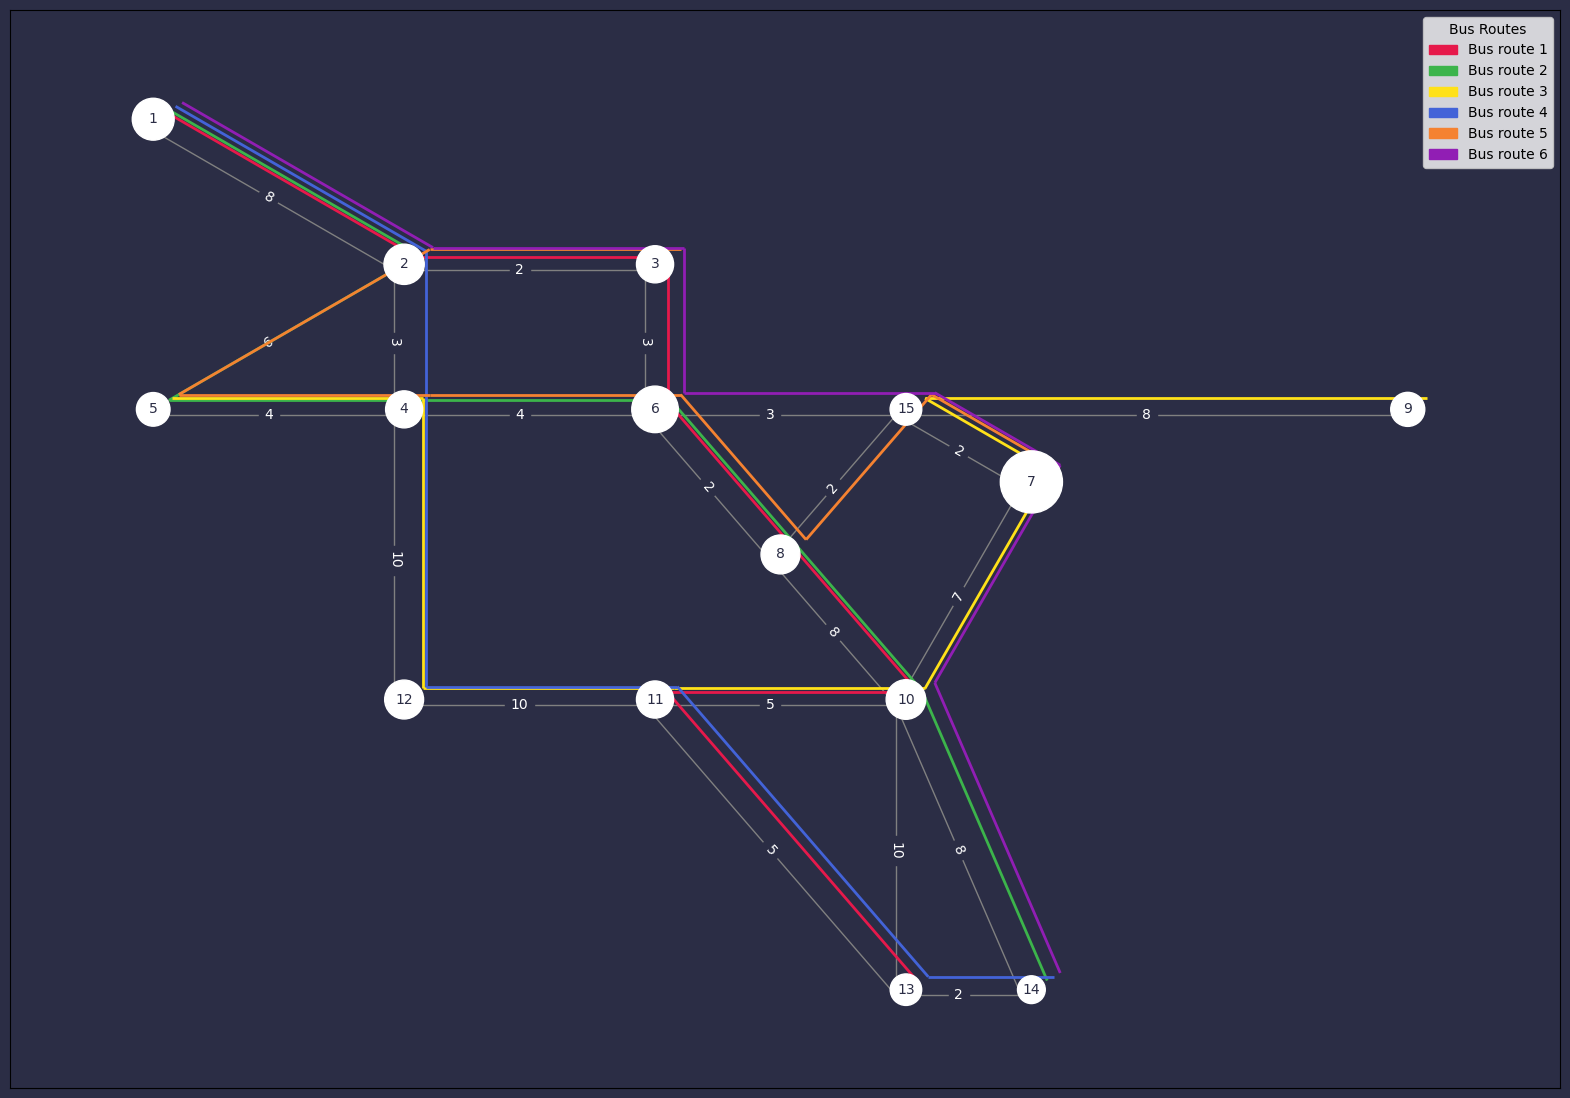

In [28]:
bus_routes = [
    [1, 2, 3, 6, 8, 10, 11, 13],    # Bus route 1
    [14, 10, 8, 6, 4, 5, 2, 1],      # Bus route 2
    [5, 4, 12, 11, 10, 7, 15, 9],    # Bus route 3
    [1, 2, 4, 12, 11, 13, 14],       # Bus route 4
    [7, 15, 8, 6, 4, 5, 2, 3],       # Bus route 5
    [1, 2, 3, 6, 15, 7, 10, 14]      # Bus route 6
]

draw_bus_routes(G, positions, bus_routes, demand_matrix)

In [29]:
all_paths, od_matrix_df = calculate_travel_times(bus_routes, travel_times)
cp = calculate_cp_score(od_matrix_df,demand_matrix)
co = calculate_co_score(bus_routes,od_matrix_df)

#c0 = calculate_co_score
print("Operaor cost:", co)
print("Passanger cost:", cp)

Operaor cost: 212.0
Passanger cost: 10.179833012202954


# Genetic Algorithm

In [30]:
def generate_and_score_networks(travel_times_matrix, demand_matrix, num_networks, num_routes, stops_per_route):
    # Dictionary to hold the scores for each network
    network_scores = {'CP_Score': [], 'CO_Score': [], 'Score': [],'Routes':[]}
    
    for n in range(num_networks):
        # Generate random bus routes
        bus_routes = generate_bus_routes(travel_times_matrix, num_routes, stops_per_route)
        
        # Calculate the scores for the generated bus routes
        all_paths, route_travel_times_matrix = calculate_travel_times(bus_routes, travel_times)
        cp_score = calculate_cp_score(route_travel_times_matrix, demand_matrix)
        co_score = calculate_co_score(bus_routes, route_travel_times_matrix)
        score = calculate_score(cp_score,co_score)
        # Add the scores to the dictionary
        network_scores['CP_Score'].append(cp_score)
        network_scores['CO_Score'].append(co_score)
        network_scores['Score'].append(score)
        network_scores['Routes'].append(bus_routes)

        # Optional: print out the routes and their scores
        #print(f"Network {n+1}: CP Score = {cp_score}, CO Score = {co_score}")
        #print(f"Routes: {bus_routes}")
        
    return pd.DataFrame(network_scores)

In [31]:
# Now you can call the generate_and_score_networks function to create and score 10 networks
num_networks = 10
num_routes = 6
stops_per_route = 10
pd.set_option("max_colwidth", None)
network_scores_df = generate_and_score_networks(travel_times_matrix, demand_matrix, num_networks, num_routes, stops_per_route)
network_scores_df.sort_values(by='Score', ascending=True)

,CP_Score,CO_Score,Score,Routes
6,13.136159,148.0,281269.5,"[[12, 4, 5, 2, 3, 6, 8, 15, 9], [4, 12, 11, 10, 14, 13], [5, 2, 1], [6, 15, 9], [3, 2, 4, 12, 11, 10, 7, 15, 8, 6], [2, 1]]"
8,13.338471,153.0,287952.0,"[[12, 4, 2, 1], [3, 2, 4, 6, 15, 8, 10, 7], [14, 10, 11, 12, 4, 5, 2, 1], [7, 10, 13, 14], [1, 2, 4, 6, 3], [3, 6, 8, 15, 9]]"
0,11.633269,195.0,304327.5,"[[2, 3, 6, 15, 7, 10, 13, 11, 12, 4], [5, 4, 12, 11, 13, 14, 10, 7, 15, 6], [9, 15, 8, 6, 3, 2, 4, 5], [1, 2, 4, 5], [12, 4, 6, 15, 7, 10, 8], [7, 10, 11, 13, 14]]"
1,11.199101,261.0,356281.5,"[[7, 15, 9], [6, 15, 7, 10, 11, 12, 4, 5, 2, 3], [6, 15, 7, 10, 14, 13, 11, 12, 4, 5], [1, 2, 4, 6, 8, 10, 13, 11, 12], [3, 6, 15, 7, 10, 11, 12, 4, 2, 1], [1, 2, 4, 12, 11, 10, 7, 15, 6, 8]]"
3,15.737315,230.0,382492.5,"[[3, 2, 4, 5], [4, 5, 2, 3, 6, 15, 7, 10, 13, 11], [3, 6, 8, 10, 11, 13, 14], [5, 4, 2, 1], [1, 2, 4, 6, 3], [12, 4, 2, 1]]"
9,14.791265,257.0,394773.0,"[[4, 6, 3, 2, 1], [12, 11, 13, 10, 7, 15, 6, 3, 2, 5], [7, 15, 8, 10, 11, 13, 14], [12, 4, 6, 8, 15, 7, 10, 13, 14], [2, 4, 5], [6, 4, 5, 2, 1]]"
4,15.674374,255.0,403357.5,"[[3, 2, 5, 4, 6, 8, 10, 14, 13, 11], [15, 7, 10, 13, 14], [2, 4, 12, 11, 13, 14, 10, 7, 15, 6], [8, 6, 4, 2, 5], [1, 2, 4, 6, 3], [3, 2, 1]]"
2,11.857418,324.0,418401.0,"[[2, 5, 4, 6, 8, 10, 14, 13, 11, 12], [10, 13, 11, 12, 4, 5, 2, 1], [7, 10, 14, 13, 11, 12, 4, 5, 2, 1], [9, 15, 8, 10, 14, 13, 11, 12, 4, 6], [1, 2, 4, 12, 11, 10, 8, 6, 15, 9], [11, 12, 4, 2, 3, 6, 15, 8, 10, 7]]"
5,14.719974,317.0,445780.5,"[[3, 6, 4, 2, 5], [6, 4, 12, 11, 10, 8, 15, 7], [13, 11, 10, 7, 15, 6, 3, 2, 1], [13, 10, 14], [7, 15, 8, 10, 14, 13, 11, 12, 4, 6], [1, 2, 5, 4, 12, 11, 10, 8, 15, 6]]"
7,14.167630,343.0,461794.5,"[[13, 14, 10, 8, 15, 7], [1, 2, 3, 6, 15, 7, 10, 13, 11, 12], [1, 2, 5, 4, 12, 11, 13, 14, 10, 7], [14, 13, 11, 12, 4, 6, 8, 10, 7, 15], [11, 10, 8, 15, 7], [12, 11, 13, 10, 8, 6, 4, 2, 3]]"


C:\Users\jespe\AppData\Local\Temp\ipykernel_13512\595590351.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  draw_bus_routes(G, positions, best_network[3], demand_matrix)
C:\Users\jespe\AppData\Local\Temp\ipykernel_13512\3425371719.py:79: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos=route_positions, edgelist=route_edges, edge_color=route_color, width=2)


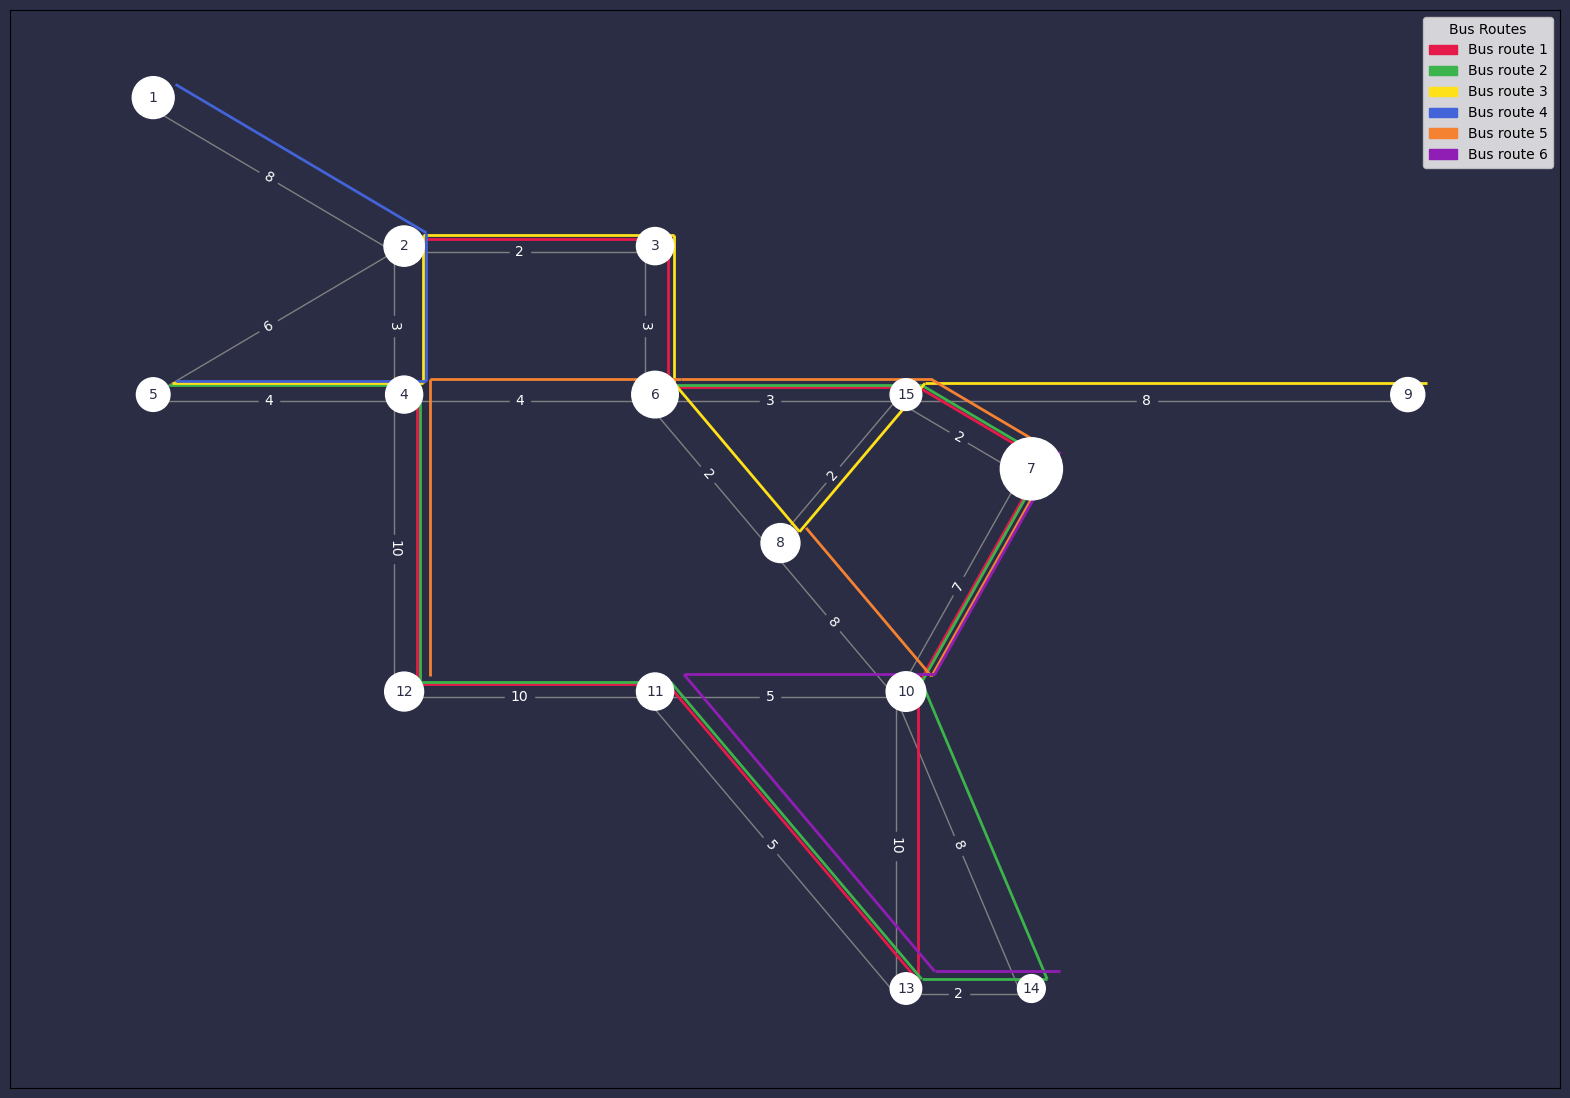

In [32]:
# Sort the DataFrame by the 'Score' column in descending order to get the best network
best_network = network_scores_df.iloc[0]

draw_bus_routes(G, positions, best_network[3], demand_matrix)

In [33]:
pip install tqdm


In [34]:
def one_point_crossover(routes1, routes2):
    # Implement your crossover logic here, assuming single-point crossover
    crossover_point = random.randint(1, len(routes1) - 2)
    child1_routes = routes1[:crossover_point] + routes2[crossover_point:]
    child2_routes = routes2[:crossover_point] + routes1[crossover_point:]
    return child1_routes, child2_routes


def two_point_crossover(routes1, routes2):
    # Choose two crossover points
    point1, point2 = sorted(random.sample(range(1, len(routes1)), 2))

    # Create offspring by combining segments from both parents
    child1_routes = routes1[:point1] + routes2[point1:point2] + routes1[point2:]
    child2_routes = routes2[:point1] + routes1[point1:point2] + routes2[point2:]

    return child1_routes, child2_routes
# Uniform crossover
def uniform_crossover(routes1, routes2):
    # Initialize the offspring with empty lists
    child1_routes = []
    child2_routes = []

    # For each route, randomly choose which parent it comes from
    for i in range(len(routes1)):
        if random.random() < 0.5:
            child1_routes.append(list(routes1[i]))  # Use list() to create a copy
            child2_routes.append(list(routes2[i]))  # Use list() to create a copy
        else:
            child1_routes.append(list(routes2[i]))  # Use list() to create a copy
            child2_routes.append(list(routes1[i]))  # Use list() to create a copp
    return child1_routes, child2_routes

In [74]:
import random
from tqdm import tqdm
def assign_scores_to_population(population, travel_times_matrix, demand_matrix):
    for index, individual in population.iterrows():
        # Here, individual['Routes'] is the entire network for one individual
        routes_network = individual['Routes']
        _, route_travel_time_matrix = calculate_travel_times(routes_network, travel_times)
        # Calculate the CP and CO scores for the entire network of routes
        cp_score = calculate_cp_score(route_travel_time_matrix, demand_matrix)
        co_score = calculate_co_score(routes_network, route_travel_time_matrix)  # OD matrix generation is assumed to be part of this function
        
        # Calculate the final score using the CP and CO scores
        final_score = calculate_score(cp_score, co_score)
        
        # Update the population DataFrame with the new scores
        population.at[index, 'CP_Score'] = cp_score
        population.at[index, 'CO_Score'] = co_score
        population.at[index, 'Score'] = final_score

    return population
def score_routes(routes, travel_times_matrix, demand_matrix):
    _, route_travel_time_matrix = calculate_travel_times(routes, travel_times_matrix)
    cp_score = calculate_cp_score(route_travel_time_matrix, demand_matrix)
    co_score = calculate_co_score(routes, route_travel_time_matrix)
    final_score = calculate_score(cp_score, co_score)
    return final_score

def mutate(offspring_population, travel_times_matrix, mutation_rate, stops_per_route):

    # Apply mutation based on the mutation rate

    for index, individual in offspring_population.iterrows():
        if random.random() < mutation_rate:
            # Mutate each route of the individual
            mutated_routes = [mutate_route(route, travel_times_matrix, stops_per_route) for route in individual['Routes']]
            offspring_population.at[index, 'Routes'] = mutated_routes
    offspring_population = assign_scores_to_population(offspring_population, travel_times_matrix, demand_matrix)
    return offspring_population

def mutate_route(route, travel_time_matrix, stops_per_route):
    """
    Mutates a given bus route by either removing the first/last station or adding a new station at the start/end.
    Ensures that the new station is connected to the adjacent station.
    
    :param route: A list representing the current route (e.g., [1, 2, 4, 6])
    :param travel_time_matrix: A numpy array representing the travel times between stations.
                               A value of 10000 indicates no connection.
    :return: A mutated route as a list (e.g., [1, 2, 4, 6, 3])
    """
    travel_time_matrix_array = travel_time_matrix.to_numpy()
    # Randomly decide the mutation action
    action = np.random.choice(['add_start', 'add_end', 'remove_start', 'remove_end'])
    
    # Convert one-based indices to zero-based for matrix operations
    route_zero_indexed = [station-1 for station in route]
    
    if action == 'add_start' and len(route) < stops_per_route:
        # Find potential stations to add at the start, that are connected to the first station of the route
        connected_stations = np.where(travel_time_matrix_array[:, route_zero_indexed[0]] < 10000)[0]
        # Exclude the sotp aleady in line
        potential_starts = [station for station in connected_stations if station not in route_zero_indexed]
        if potential_starts:
            new_start = np.random.choice(potential_starts) + 1  # Convert back to one-based index
            route.insert(0, new_start)

    elif action == 'add_end' and len(route) < stops_per_route:
        # Find potential stations to add at the end, that are connected to the last station of the route
        connected_stations = np.where(travel_time_matrix_array[route_zero_indexed[-1], :] < 10000)[0]
        # Exclude the current last station and the one before it
        potential_ends = [station for station in connected_stations if station not in route_zero_indexed]
        if potential_ends:
            new_end = np.random.choice(potential_ends) + 1  # Convert back to one-based index
            route.append(new_end)

    elif action == 'remove_start' and len(route) > 2:
        # Remove the first station
        route.pop(0)

    elif action == 'remove_end' and len(route) > 2:
        # Remove the last station
        route.pop()
    
    return route


def genetic_algorithm(travel_times_matrix, demand_matrix, num_generations, population_size, 
                      num_routes, stops_per_route, mutation_rate, desired_score = "Score", dynamic_mutation = True, seeding = False):
    
    # Generate the initial population of networks
    population = generate_and_score_networks(travel_times_matrix, demand_matrix, population_size, num_routes, stops_per_route)
    generation_results = []
    #display(population)
    for generation in tqdm(range(num_generations), desc="Generation"):
        if dynamic_mutation == True:
            mutation_rate-=0.005
            mutation_rate = max(mutation_rate, 0.001)
            
        # Sort the population by score in ascending order
        population.sort_values(by=desired_score, ascending=True, inplace=True)
        population = assign_scores_to_population(population, travel_times_matrix, demand_matrix)
        
        if len(population) > (population_size // 2): # Elitism: Take the top 50% of the networks as elites
            elite_count = (population_size // 2)
            if seeding == True:
                genetic_variation_count = (population_size // 10)
        # If the population is too small due to purge if identical genes we fill the rest of the population 
        # With new chromosomes
        else: 
            elite_count = len(population)
            if seeding == True:
                genetic_variation_count = (population_size // 2)-elite_count
        
        elite_population = population.head(elite_count).copy()
        if seeding == True:
            genetic_variation_population = generate_and_score_networks(travel_times_matrix, demand_matrix, genetic_variation_count, num_routes, stops_per_route)
            elite_population = pd.concat([elite_population, genetic_variation_population], ignore_index=True)
            
        offspring_population_list = []

        # Continue generating offspring until we have enough to fill the new population
        while len(offspring_population_list) <= population_size - len(elite_population):
            # Randomly select two parents from the elite population
            parents = elite_population.sample(2, replace=True)
            parent1, parent2 = parents.iloc[0], parents.iloc[1]

            # Perform crossover on the parent routes to generate offspring routes
            child1_routes, child2_routes = uniform_crossover(parent1['Routes'], parent2['Routes'])
            # Append the offspring to the offspring_population_list
            # Evaluate children immediately after crossover
            # For Child 1
            _, od_matrix_df_child1 = calculate_travel_times(child1_routes, travel_times)
            cp_score_1 = calculate_cp_score(od_matrix_df_child1, demand_matrix)
            co_score_1 = calculate_co_score(child1_routes, od_matrix_df_child1)
            child1_score = calculate_score(cp_score_1, co_score_1)

            # For Child 2
            _, od_matrix_df_child2 = calculate_travel_times(child2_routes, travel_times)
            cp_score_2 = calculate_cp_score(od_matrix_df_child2, demand_matrix)
            co_score_2 = calculate_co_score(child2_routes, od_matrix_df_child2)
            child2_score = calculate_score(cp_score_2, co_score_2)
            if desired_score == "Score":
                child1_score = child1_score
                child2_score = child2_score
            elif desired_score == "CP_Score":
                child2_score = cp_score_2
                child1_score = cp_score_1
            else:
                child2_score = co_score_2
                child1_score = co_score_1
            # Append the offspring to the offspring_population_list
            # You may include conditions to check if the children's scores are better than the parents'
            if child1_score*min(random.random(),0.95)<max(parent1[desired_score], parent2[desired_score]):
                offspring_population_list.append({
                    'CP_Score': cp_score_1, 
                    'CO_Score': co_score_1,
                    'Score': child1_score,
                    'Routes': child1_routes
                })
            if child2_score*min(random.random(),0.95)<max(parent1[desired_score], parent2[desired_score]):
                offspring_population_list.append({
                    'CP_Score': cp_score_2, 
                    'CO_Score': co_score_2, 
                    'Score': child2_score,
                    'Routes': child2_routes
                })
        # After this loop, convert offspring_population_list to a DataFrame
        offspring_population = pd.DataFrame(offspring_population_list)
        offspring_population = mutate(offspring_population, travel_times_matrix, mutation_rate, stops_per_route)
        # After creating offspring, concatenate them with the elite population to form the new population
        new_population = pd.concat([elite_population, offspring_population], ignore_index=True)
        #Mutation: Apply random changes to the offspring population
        #new_population.iloc[len(elite_population):] = mutate(new_population.iloc[len(elite_population):], travel_times_matrix, mutation_rate)
        
        new_population.sort_values(by=desired_score, ascending=True, inplace=True)
        
        #population = assign_scores_to_population(new_population, travel_times_matrix, demand_matrix)
        population = new_population
        pd.set_option("max_colwidth", None)
        population.sort_values(by=desired_score, ascending=True, inplace=True)
        
        # Convert the list of routes to a string or a tuple to make them hashable
        population['Routes_str'] = population['Routes'].apply(lambda x: str(x))
        population = population.drop_duplicates(subset='Routes_str', keep='first').reset_index(drop=True)
        population.drop(columns=['Routes_str'], inplace=True)  # Drop the auxiliary column after removing duplicates
        generation_results.append({
            "Generation": generation + 1,  # Generations are 1-indexed for reporting
            "Best CP": population.iloc[0]['CP_Score'],
            "Best CO": population.iloc[0]['CO_Score'],
            "Best " + desired_score: population.iloc[0][desired_score],
            "Mean " + desired_score: population[desired_score].mean(),
            "Routes": population.iloc[0]['Routes']
        })

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(generation_results)
    
    # Save the results DataFrame to a CSV file, named according to the desired score type
    results_filename = f"results_{desired_score}.csv"
    results_df.to_csv(results_filename, index=False)
    
    return results_df




## Optimize by Passanger Cost

In [76]:
results_df  = genetic_algorithm(travel_times_matrix, demand_matrix, 5000, 50, 6, 8, 0.5,"CP_Score", True, True)

Generation: 100%|██████████| 5000/5000 [4:59:12<00:00,  3.59s/it]  


In [77]:
# Assuming the desired_score was set to "CP_Score" when the CSV was saved
csv_filename = "results_CP_Score.csv"

# Read the CSV file into a DataFrame
df_CP = pd.read_csv(csv_filename)

# Display the first few rows of the DataFrame to confirm it's loaded correctly
pd.set_option("max_colwidth", None)
df_CP.head(100)

,Generation,Best CP,Best CO,Best CP_Score,Mean CP_Score,Routes
0,1,10.785485,192.0,10.785485,14.969411,"[[1, 2, 4, 12, 11, 10, 13, 14], [10, 7, 15, 8, 6, 3, 2, 1], [4, 12, 11, 13, 14, 10, 8, 15], [14, 10, 7, 15, 8, 6, 3, 2], [6, 15, 9], [14, 13, 10, 8, 6, 4, 5, 2]]"
1,2,10.785485,192.0,10.785485,14.684310,"[[1, 2, 4, 12, 11, 10, 13, 14], [10, 7, 15, 8, 6, 3, 2, 1], [4, 12, 11, 13, 14, 10, 8, 15], [14, 10, 7, 15, 8, 6, 3, 2], [6, 15, 9], [14, 13, 10, 8, 6, 4, 5, 2]]"
2,3,10.785485,192.0,10.785485,14.648015,"[[1, 2, 4, 12, 11, 10, 13, 14], [10, 7, 15, 8, 6, 3, 2, 1], [4, 12, 11, 13, 14, 10, 8, 15], [14, 10, 7, 15, 8, 6, 3, 2], [6, 15, 9], [14, 13, 10, 8, 6, 4, 5, 2]]"
3,4,10.785485,192.0,10.785485,14.202022,"[[1, 2, 4, 12, 11, 10, 13, 14], [10, 7, 15, 8, 6, 3, 2, 1], [4, 12, 11, 13, 14, 10, 8, 15], [14, 10, 7, 15, 8, 6, 3, 2], [6, 15, 9], [14, 13, 10, 8, 6, 4, 5, 2]]"
4,5,10.785485,192.0,10.785485,12.975342,"[[1, 2, 4, 12, 11, 10, 13, 14], [10, 7, 15, 8, 6, 3, 2, 1], [4, 12, 11, 13, 14, 10, 8, 15], [14, 10, 7, 15, 8, 6, 3, 2], [6, 15, 9], [14, 13, 10, 8, 6, 4, 5, 2]]"
...,...,...,...,...,...,...
95,96,10.346821,204.0,10.346821,12.838216,"[[1, 2, 5, 4, 6, 8, 15, 7], [1, 2, 3, 6, 15, 7, 10, 11], [4, 2, 3, 6, 8, 10, 11, 13], [14, 13, 11, 10, 7, 15, 9], [13, 14, 10, 11, 12, 4, 2, 1], [12, 11, 13, 10, 8, 6, 4, 5]]"
96,97,10.346821,204.0,10.346821,11.780550,"[[1, 2, 5, 4, 6, 8, 15, 7], [1, 2, 3, 6, 15, 7, 10, 11], [4, 2, 3, 6, 8, 10, 11, 13], [14, 13, 11, 10, 7, 15, 9], [13, 14, 10, 11, 12, 4, 2, 1], [12, 11, 13, 10, 8, 6, 4, 5]]"
97,98,10.346821,204.0,10.346821,11.600193,"[[1, 2, 5, 4, 6, 8, 15, 7], [1, 2, 3, 6, 15, 7, 10, 11], [4, 2, 3, 6, 8, 10, 11, 13], [14, 13, 11, 10, 7, 15, 9], [13, 14, 10, 11, 12, 4, 2, 1], [12, 11, 13, 10, 8, 6, 4, 5]]"
98,99,10.326268,201.0,10.326268,11.869291,"[[1, 2, 5, 4, 6, 8, 15, 7], [1, 2, 3, 6, 15, 7, 10, 11], [5, 4, 2, 3, 6, 8, 10, 11], [14, 13, 11, 10, 7, 15, 9], [14, 10, 11, 12, 4, 2, 1], [12, 11, 13, 10, 8, 6, 4, 5]]"


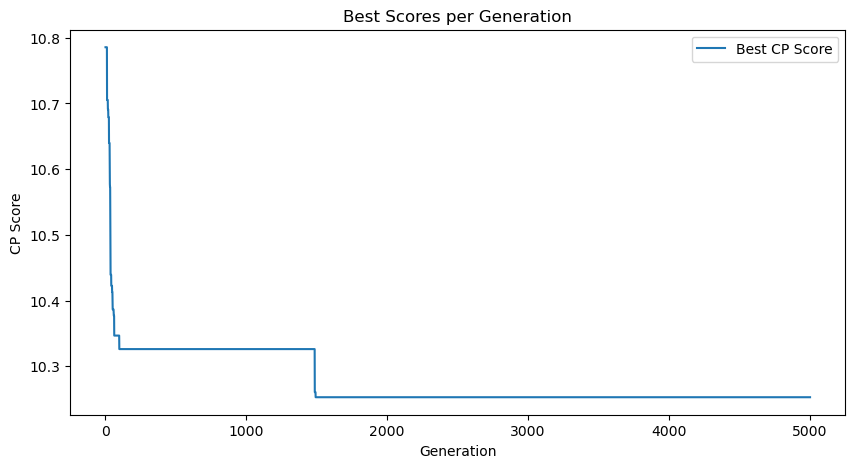

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
#plt.plot(results_df['Generation'], results_df['Best CP'], label='Best CP Score')
#plt.plot(results_df['Generation'], results_df['Best CO'], label='Best CO Score')
plt.plot(df_CP['Generation'], df_CP['Best CP_Score'], label='Best CP Score')
#plt.plot(df_CP['Generation'], df_CP['Mean CP_Score'], label='Mean CP Score')
plt.xlabel('Generation')
plt.ylabel('CP Score')
plt.title('Best Scores per Generation')
plt.legend()
plt.show()

In [79]:
import ast
# Find the row with the lowest score
best_CP_network = df_CP.loc[df_CP['Best CP_Score'].idxmin()]

# Extract the route from this row
best_CP_routes = best_CP_network['Routes']
best_CP_co= best_CP_network['Best CO']
best_CP_cp=best_CP_network['Best CP']
scores= calculate_score(best_CP_cp,best_CP_co)
print(best_CP_cp)
print(best_CP_co)
print(scores)
print(best_CP_routes)
best_CP_routes = ast.literal_eval(best_CP_routes)


10.253050738599873
209.0
300306.0
[[1, 2, 5, 4, 6, 8, 15, 7], [1, 2, 3, 6, 15, 7, 10, 11], [13, 11, 10, 8, 6, 3, 2, 1], [14, 13, 11, 10, 7, 15, 9], [13, 14, 10, 11, 12, 4, 2, 1], [12, 11, 13, 10, 8, 6, 4, 5]]


In [80]:
#CONTROLL CALCULATE SCORES
_, route_travel_time_matrix = calculate_travel_times(list(best_CP_routes), travel_times)
cp_score = calculate_cp_score(route_travel_time_matrix, demand_matrix)
co_score = calculate_co_score(best_CP_routes, route_travel_time_matrix)
scores= calculate_score(cp_score,co_score)
print(cp_score)
print(co_score)
print(scores)

print(best_CP_routes) #10.1718

10.253050738599871
209.0
300306.0
[[1, 2, 5, 4, 6, 8, 15, 7], [1, 2, 3, 6, 15, 7, 10, 11], [13, 11, 10, 8, 6, 3, 2, 1], [14, 13, 11, 10, 7, 15, 9], [13, 14, 10, 11, 12, 4, 2, 1], [12, 11, 13, 10, 8, 6, 4, 5]]


C:\Users\jespe\AppData\Local\Temp\ipykernel_13512\3425371719.py:79: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos=route_positions, edgelist=route_edges, edge_color=route_color, width=2)


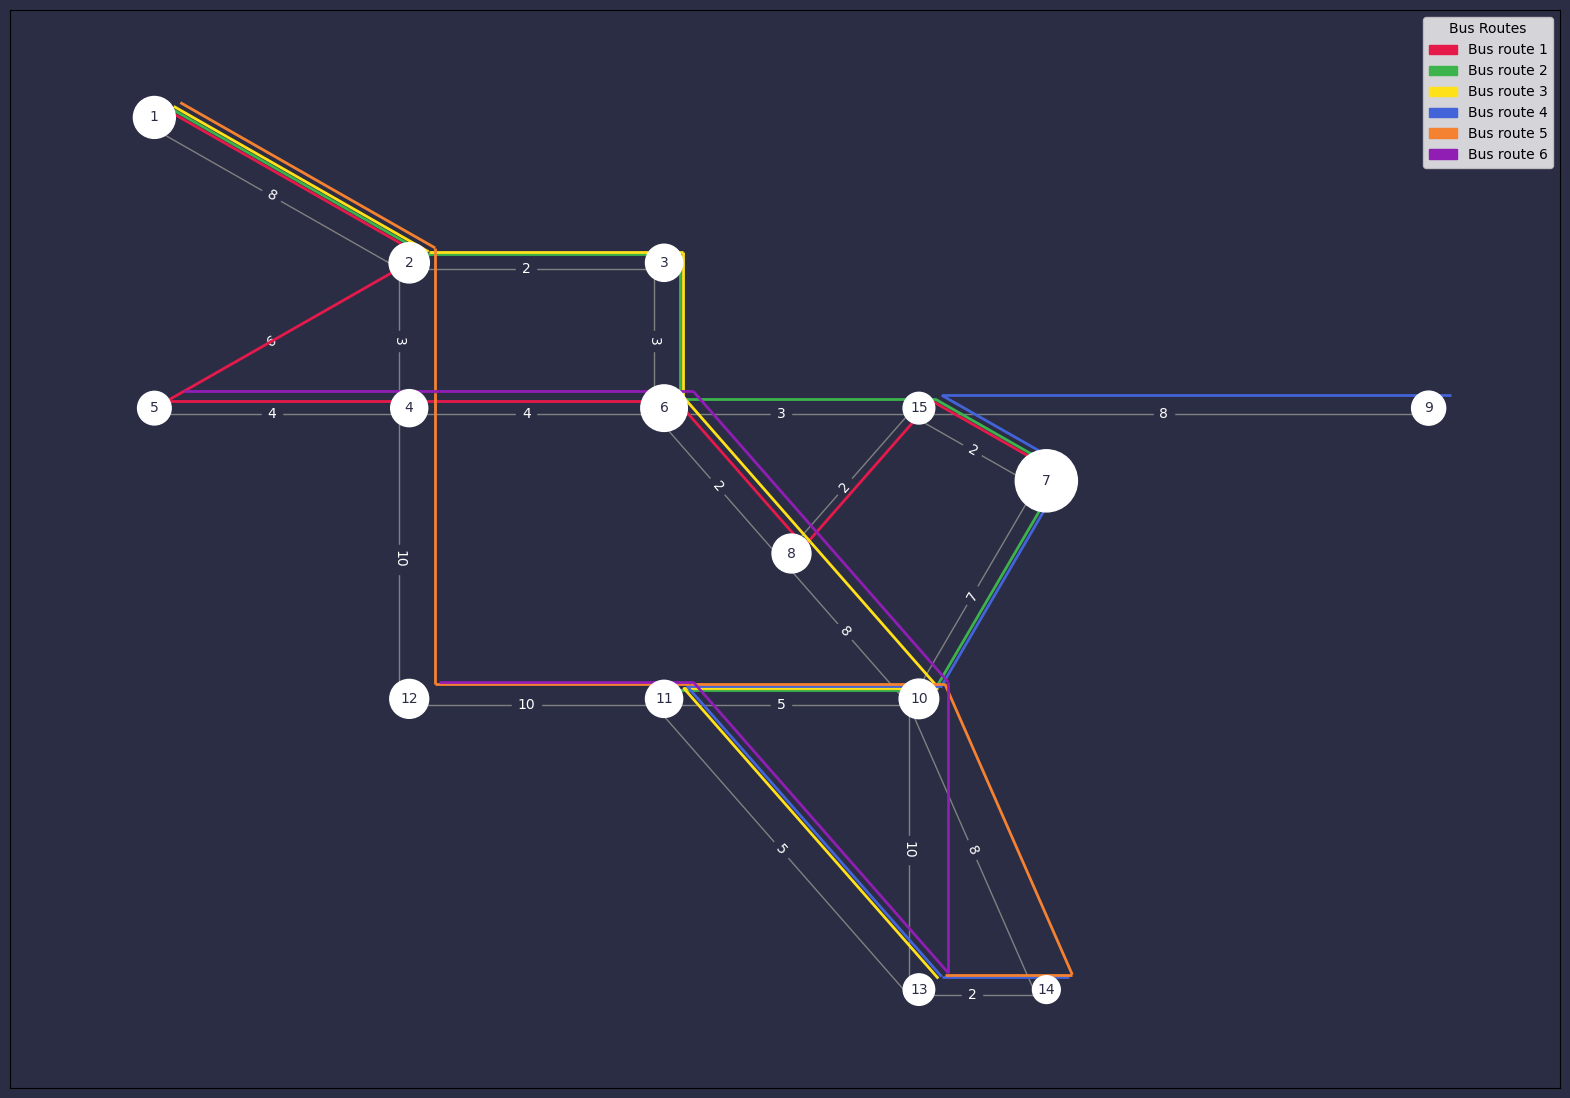

In [81]:
draw_bus_routes(G, positions, best_CP_routes, demand_matrix)


## Optimize by Operator Cost

In [50]:
results_df  = genetic_algorithm(travel_times_matrix, demand_matrix, 5000, 50, 6, 8, 0.5,"CO_Score", True, True)


Generation: 100%|██████████| 5000/5000 [3:04:10<00:00,  2.21s/it]  


In [51]:
# Assuming the desired_score was set to "CP_Score" when the CSV was saved
csv_filename = "results_CO_Score.csv"

# Read the CSV file into a DataFrame
df_CO = pd.read_csv(csv_filename)

# Display the first few rows of the DataFrame to confirm it's loaded correctly
pd.set_option("max_colwidth", None)
df_CO

,Generation,Best CP,Best CO,Best CO_Score,Mean CO_Score,Routes
0,1,12.436095,121.0,121.0,229.400000,"[[10, 7, 15, 9], [10, 7, 15, 6, 8], [12, 4, 5, 2, 3, 6, 8, 10, 11, 13, 14], [7, 15, 9], [3, 6, 4, 2, 1], [11, 10, 14, 13]]"
1,2,12.534361,114.0,114.0,209.653846,"[[10, 7, 15, 9], [11, 10, 7, 15, 6, 8], [12, 4, 5, 2, 3, 6, 8, 10, 11, 13, 14], [15, 9], [6, 4, 2, 1], [15, 9]]"
2,3,12.534361,114.0,114.0,209.734694,"[[10, 7, 15, 9], [11, 10, 7, 15, 6, 8], [12, 4, 5, 2, 3, 6, 8, 10, 11, 13, 14], [15, 9], [6, 4, 2, 1], [15, 9]]"
3,4,12.534361,114.0,114.0,210.615385,"[[10, 7, 15, 9], [11, 10, 7, 15, 6, 8], [12, 4, 5, 2, 3, 6, 8, 10, 11, 13, 14], [15, 9], [6, 4, 2, 1], [15, 9]]"
4,5,15.180475,106.0,106.0,199.100000,"[[4, 2, 5], [7, 15, 9], [10, 7, 15, 6, 4, 2, 3], [3, 6, 8, 15, 9], [12, 4, 5, 2, 1], [11, 13, 10, 14]]"
...,...,...,...,...,...,...
4995,4996,17.572897,67.0,67.0,107.700000,"[[10, 7, 15], [3, 6], [12, 11, 10, 14, 13], [8, 15, 9], [3, 2, 1], [8, 6, 4, 5]]"
4996,4997,17.572897,67.0,67.0,118.682927,"[[10, 7, 15], [3, 6], [12, 11, 10, 14, 13], [8, 15, 9], [3, 2, 1], [8, 6, 4, 5]]"
4997,4998,17.572897,67.0,67.0,116.622222,"[[10, 7, 15], [3, 6], [12, 11, 10, 14, 13], [8, 15, 9], [3, 2, 1], [8, 6, 4, 5]]"
4998,4999,17.572897,67.0,67.0,121.952381,"[[10, 7, 15], [3, 6], [12, 11, 10, 14, 13], [8, 15, 9], [3, 2, 1], [8, 6, 4, 5]]"


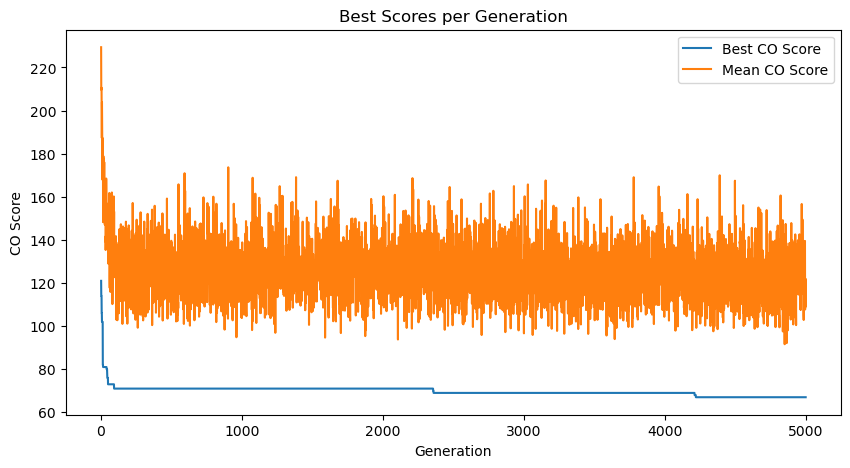

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
#plt.plot(results_df['Generation'], results_df['Best CP'], label='Best CP Score')
#plt.plot(results_df['Generation'], results_df['Best CO'], label='Best CO Score')
plt.plot(df_CO['Generation'], df_CO['Best CO_Score'], label='Best CO Score')
plt.plot(df_CO['Generation'], df_CO['Mean CO_Score'], label='Mean CO Score')
plt.xlabel('Generation')
plt.ylabel('CO Score')
plt.title('Best Scores per Generation')
plt.legend()
plt.show()

In [53]:
# Find the row with the lowest score
best_CO_network = df_CO.loc[df_CO['Best CO_Score'].idxmin()]

# Extract the route from this row
best_CO_routes = best_CO_network['Routes']
best_CO_co= best_CO_network['Best CO']
best_CO_cp=best_CO_network['Best CP']
print(best_CO_cp)
print(best_CO_co)
print(best_CO_routes)
best_CO_routes = ast.literal_eval(best_CO_routes)


17.572896596017983
67.0
[[10, 7, 15], [3, 6], [12, 11, 10, 14, 13], [8, 15, 9], [3, 2, 1], [8, 6, 4, 5]]


In [54]:
#CONTROLL CALCULATE SCORES
_, route_travel_time_matrix = calculate_travel_times(best_CO_routes, travel_times)
cp_score = calculate_cp_score(route_travel_time_matrix, demand_matrix)
co_score = calculate_co_score(best_CO_routes, route_travel_time_matrix)
scores= calculate_score(cp_score,co_score)
print(cp_score)
print(co_score)
print(best_CO_routes) #10.1718

17.572896596017983
67.0
[[10, 7, 15], [3, 6], [12, 11, 10, 14, 13], [8, 15, 9], [3, 2, 1], [8, 6, 4, 5]]


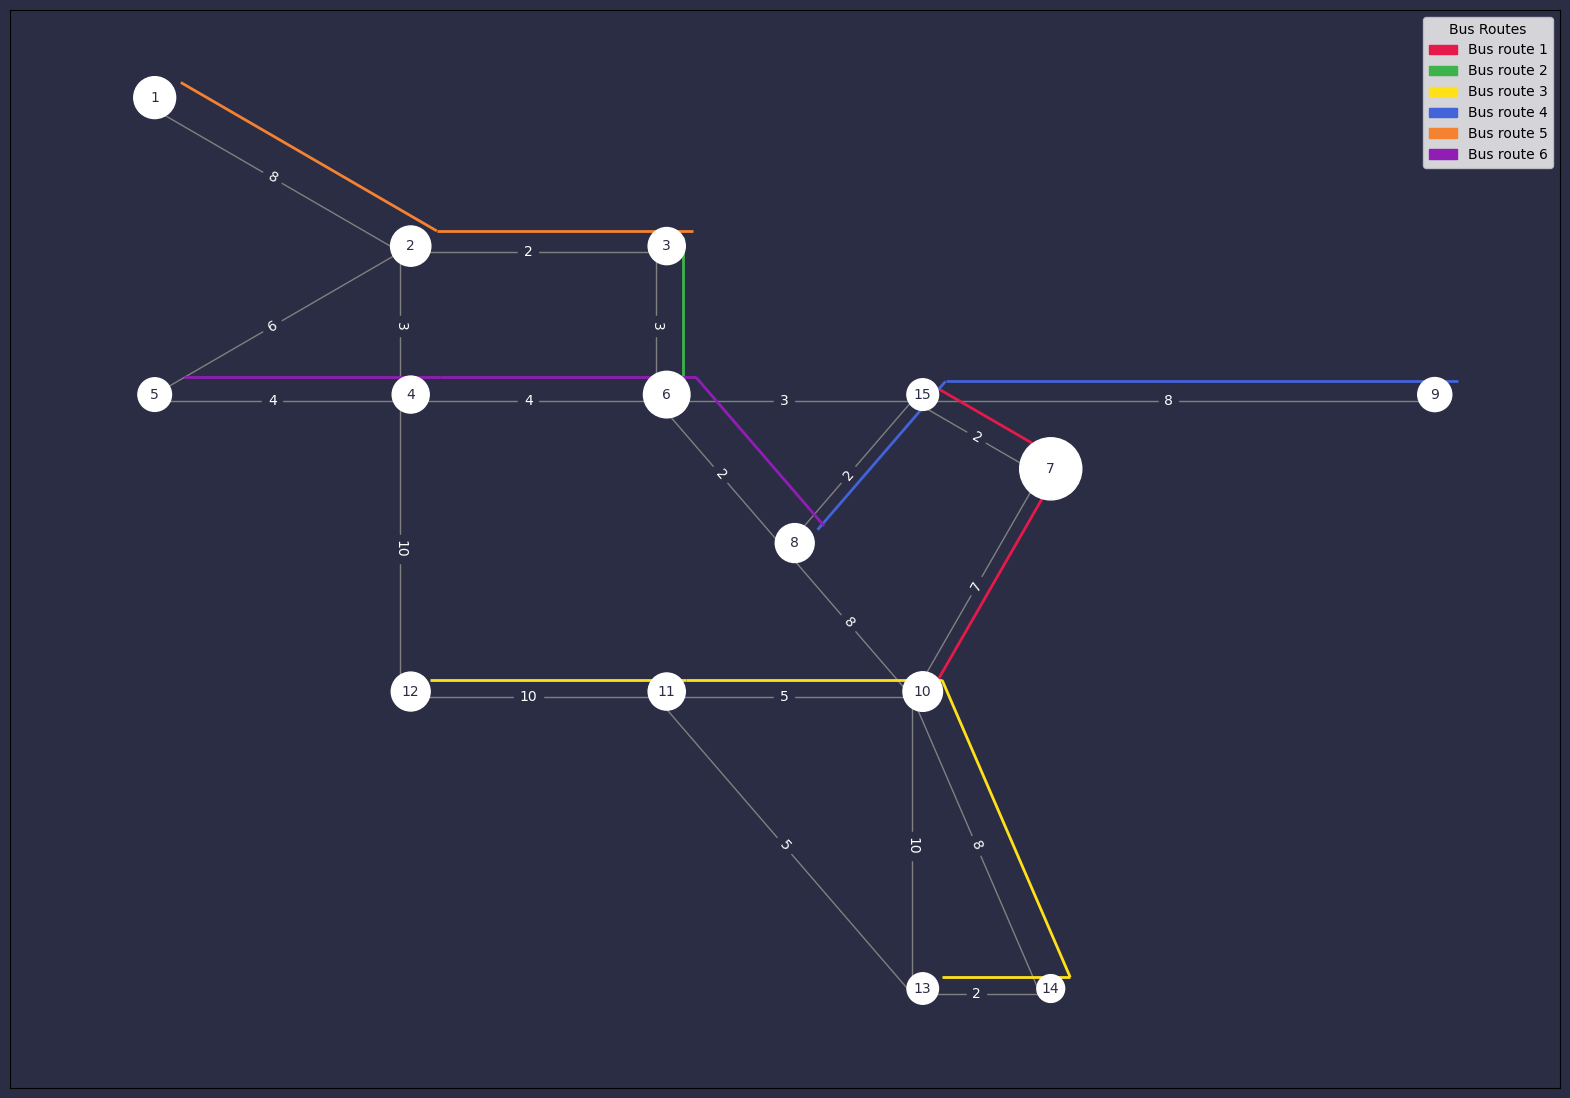

In [55]:
draw_bus_routes(G, positions, best_CO_routes, demand_matrix)


In [ ]:
import pandas as pd
import ast
df_animation = df_CO.drop_duplicates(subset='Routes')  # Drop duplicate rows based on the 'Routes' column
df_animation.head(100000)

In [ ]:
#animation = draw_bus_routes_animation(G, positions, df_animation, demand_matrix)

# CBA

In [56]:
results_df  = genetic_algorithm(travel_times_matrix, demand_matrix, 5000, 50, 6, 12, 0.01,"Score", True, True)

Generation: 100%|██████████| 5000/5000 [3:31:20<00:00,  2.54s/it]  


In [57]:
# Assuming the desired_score was set to "CP_Score" when the CSV was saved
csv_filename = "results_Score.csv"

# Read the CSV file into a DataFrame
df_Score = pd.read_csv(csv_filename)

# Display the first few rows of the DataFrame to confirm it's loaded correctly
pd.set_option("max_colwidth", None)
df_Score

,Generation,Best CP,Best CO,Best Score,Mean Score,Routes
0,1,12.466281,131.0,258759.0,350599.882353,"[[11, 10, 13, 14], [5, 4, 6, 15, 9], [6, 15, 8, 10, 7], [2, 1], [7, 15, 9], [11, 12, 4, 5, 2, 3, 6, 8, 10, 13, 14]]"
1,2,12.466281,131.0,258759.0,335092.180851,"[[11, 10, 13, 14], [5, 4, 6, 15, 9], [6, 15, 8, 10, 7], [2, 1], [7, 15, 9], [11, 12, 4, 5, 2, 3, 6, 8, 10, 13, 14]]"
2,3,12.466281,131.0,258759.0,326393.400000,"[[11, 10, 13, 14], [5, 4, 6, 15, 9], [6, 15, 8, 10, 7], [2, 1], [7, 15, 9], [11, 12, 4, 5, 2, 3, 6, 8, 10, 13, 14]]"
3,4,11.993577,137.0,258423.0,329849.820000,"[[2, 3, 6, 4, 5], [1, 2, 3, 6, 15, 9], [6, 3, 2, 4, 5], [7, 15, 6, 8, 10, 11, 12, 4, 2, 5], [6, 15, 8, 10, 11, 13, 14], [5, 2, 1]]"
4,5,11.993577,137.0,258423.0,345183.519231,"[[2, 3, 6, 4, 5], [1, 2, 3, 6, 15, 9], [6, 3, 2, 4, 5], [7, 15, 6, 8, 10, 11, 12, 4, 2, 5], [6, 15, 8, 10, 11, 13, 14], [5, 2, 1]]"
...,...,...,...,...,...,...
4995,4996,11.673732,93.0,216672.0,259754.842105,"[[2, 4, 5], [15, 9], [2, 3, 6, 4, 5], [12, 11, 10, 7, 15, 6, 3, 2, 1], [10, 11, 13, 14], [10, 8, 6, 15]]"
4996,4997,11.673732,93.0,216672.0,262730.487805,"[[2, 4, 5], [15, 9], [2, 3, 6, 4, 5], [12, 11, 10, 7, 15, 6, 3, 2, 1], [10, 11, 13, 14], [10, 8, 6, 15]]"
4997,4998,11.673732,93.0,216672.0,245586.907895,"[[2, 4, 5], [15, 9], [2, 3, 6, 4, 5], [12, 11, 10, 7, 15, 6, 3, 2, 1], [10, 11, 13, 14], [10, 8, 6, 15]]"
4998,4999,11.673732,93.0,216672.0,308897.441860,"[[2, 4, 5], [15, 9], [2, 3, 6, 4, 5], [12, 11, 10, 7, 15, 6, 3, 2, 1], [10, 11, 13, 14], [10, 8, 6, 15]]"


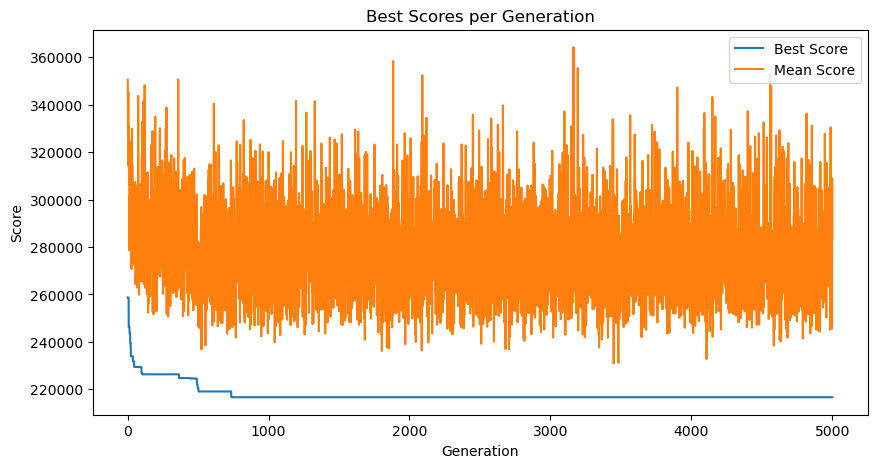

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
#plt.plot(results_df['Generation'], results_df['Best CP'], label='Best CP Score')
#plt.plot(results_df['Generation'], results_df['Best CO'], label='Best CO Score')
plt.plot(df_Score['Generation'], df_Score['Best Score'], label='Best Score')
plt.plot(df_Score['Generation'], df_Score['Mean Score'], label='Mean Score')
plt.xlabel('Generation')
plt.ylabel('Score')
plt.title('Best Scores per Generation')
plt.legend()
plt.show()

In [59]:
# Find the row with the lowest score
best_Score_network = df_Score.loc[df_Score['Best Score'].idxmin()]

# Extract the route from this row
best_Score_routes = best_Score_network['Routes']
best_Score_co= best_Score_network['Best CO']
best_Score_cp=best_Score_network['Best CP']
best_Score=best_Score_network['Best Score']

print(best_Score_cp)
print(best_Score_co)
print(best_Score)
print(best_Score_routes)
best_Score_routes = ast.literal_eval(best_Score_routes)


11.673731535003212
93.0
216672.0
[[2, 4, 5], [15, 9], [2, 3, 6, 4, 5], [12, 11, 10, 7, 15, 6, 3, 2, 1], [10, 11, 13, 14], [10, 8, 6, 15]]


In [60]:
#CONTROLL CALCULATE SCORES
_, route_travel_time_matrix = calculate_travel_times(best_Score_routes, travel_times)
cp_score = calculate_cp_score(route_travel_time_matrix, demand_matrix)
co_score = calculate_co_score(best_Score_routes, route_travel_time_matrix)
scores= calculate_score(cp_score,co_score)
print(cp_score)
print(co_score)
print(scores)
print(best_Score_routes) #10.1718

11.673731535003212
93.0
216672.0
[[2, 4, 5], [15, 9], [2, 3, 6, 4, 5], [12, 11, 10, 7, 15, 6, 3, 2, 1], [10, 11, 13, 14], [10, 8, 6, 15]]


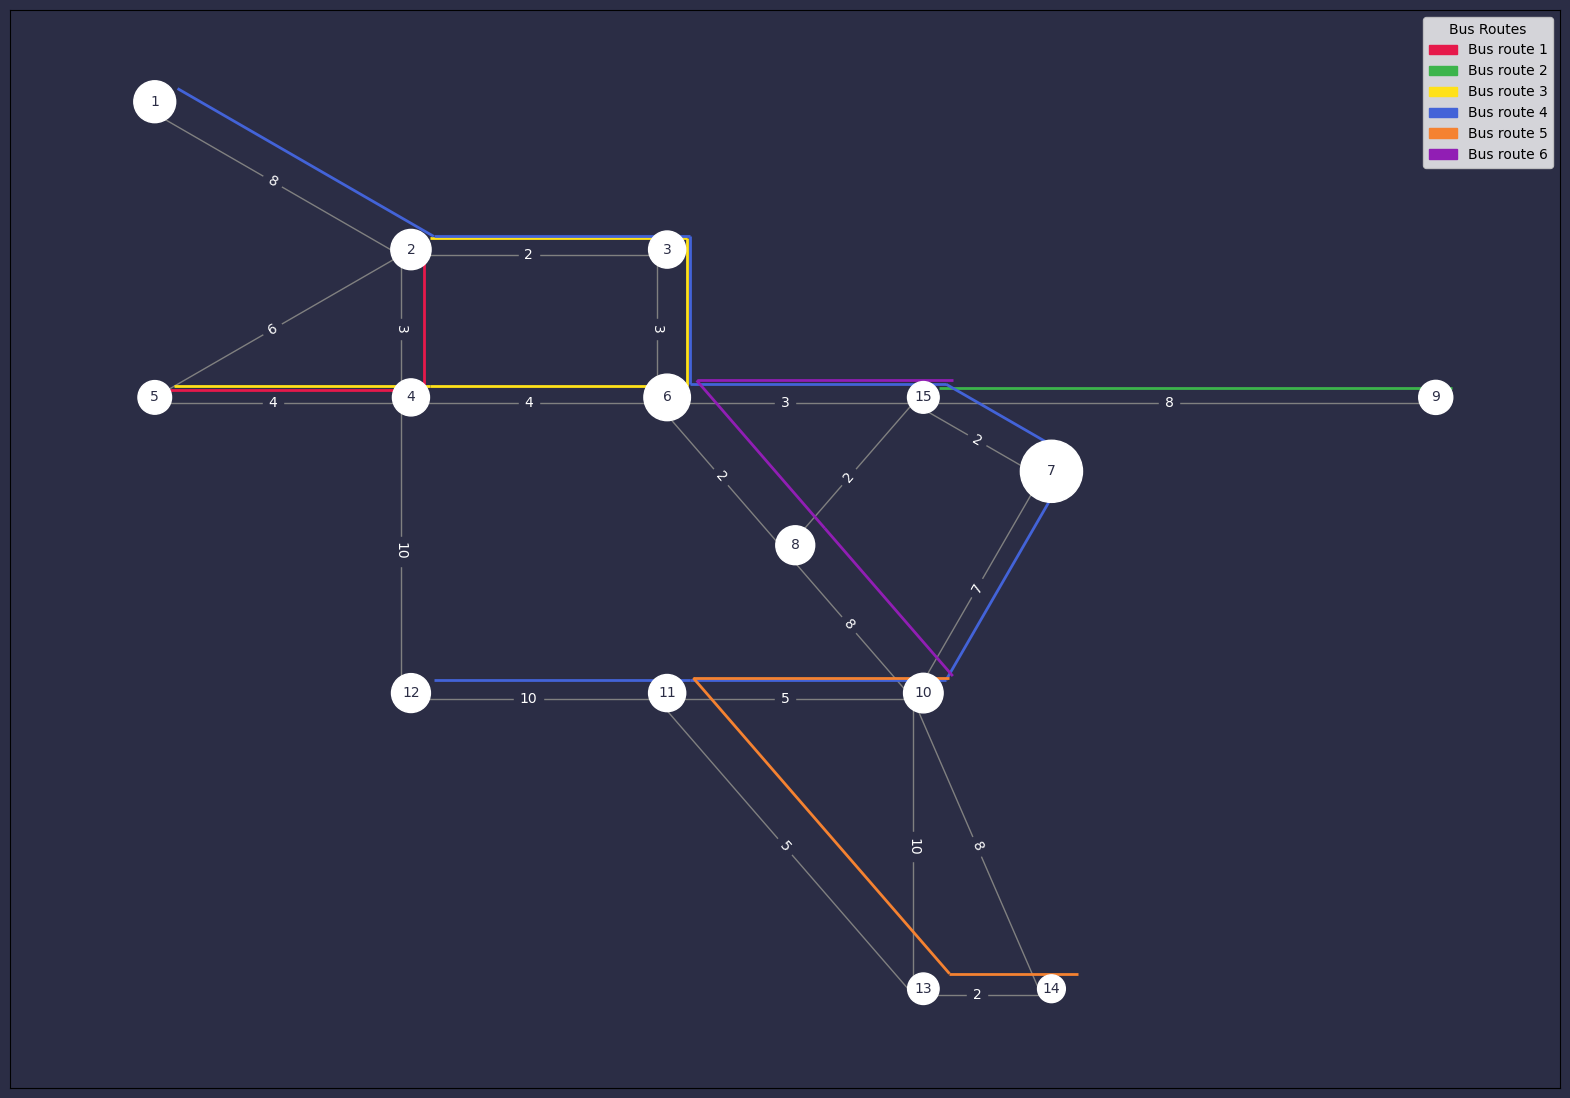

In [61]:
draw_bus_routes(G, positions, best_Score_routes, demand_matrix)


# Comparing dynaimc and static mutation

In [ ]:
static_df = pd.DataFrame(columns=['Static', 'dynamic', "iteration"])

In [ ]:
for row_index in range(30):
    results_df  = genetic_algorithm(travel_times_matrix, demand_matrix, 10+row_index*10, 50, 6, 12, 0.5,"CO_Score", True)
    lowest_value = results_df['Best CO_Score'].min()    
    #print(lowest_value)
    if row_index >= len(static_df):
        static_df.loc[row_index] = [None] * len(static_df.columns)
        
    static_df.at[row_index, 'dynamic'] = lowest_value
    static_df.at[row_index, 'iteration'] = 10+row_index*10

In [ ]:
for row_index in range(30):
    results_df  = genetic_algorithm(travel_times_matrix, demand_matrix, 10+row_index*10, 50, 6, 12, 0.01,"CO_Score", False)
    lowest_value = results_df['Best CO_Score'].min()    
    #print(lowest_value)
    if row_index >= len(static_df):
        static_df.loc[row_index] = [None] * len(static_df.columns)
        
    static_df.at[row_index, 'Static'] = lowest_value

In [ ]:
pd.set_option('display.max_rows', None)
static_df

In [ ]:
# Setting up the Seaborn style
sns.set(style="whitegrid")

# Creating the figure
plt.figure(figsize=(12, 8))

# Plotting the scatter plots
sns.scatterplot(x='iteration', y='Static', data=static_df, label='Static', color='deepskyblue', s=100, alpha=0.85)
sns.scatterplot(x='iteration', y='dynamic', data=static_df, label='Dynamic', color='coral', s=100, alpha=0.85)

# Adding title and labels
plt.title('Comparison of Static and Dynamic Mutation Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Operator Cost')

# Customizing the grid
plt.grid(True, linestyle=(0, (3, 5)))  
# Showing the legend
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
count_dynamic_lower = (static_df['dynamic'] < static_df['Static']).sum()
percentage_dynamic_lower = (count_dynamic_lower / len(static_df)) * 100
count_dynamic_lower

In [ ]:
from scipy.stats import ttest_rel

# Assuming you have a DataFrame 'df' with your data

# Conducting a paired t-test because the observations are dependent - the same routes are assessed by both HSGA and GA.
t_stat, p_val = ttest_rel(static_df['Static'], static_df['dynamic'])

# For a one-tailed test, we need to divide the p-value by 2
p_val /= 2

# Checking if the result is significant at the 5% level
is_significant = p_val < 0.05

# Printing the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")
print(f"Is significant at the 5% level: {is_significant}")

# Compare Seeding

In [ ]:
seeding_df = pd.DataFrame(columns=['HSGA', 'GA', "iteration"])

In [ ]:
for row_index in range(30):
    results_df  = genetic_algorithm(travel_times_matrix, demand_matrix, 10+row_index*10, 50, 6, 12, 0.5,"CO_Score", True, True)
    lowest_value = results_df['Best CO_Score'].min()    
    #print(lowest_value)
    if row_index >= len(seeding_df):
        seeding_df.loc[row_index] = [None] * len(seeding_df.columns)
        
    seeding_df.at[row_index, 'HSGA'] = lowest_value
    seeding_df.at[row_index, 'iteration'] = 10+row_index*10


In [ ]:
for row_index in range(30):
    results_df  = genetic_algorithm(travel_times_matrix, demand_matrix, 10+row_index*10, 50, 6, 12, 0.5,"CO_Score", True, False)
    lowest_value = results_df['Best CO_Score'].min()    
    #print(lowest_value)
    if row_index >= len(seeding_df):
        seeding_df.loc[row_index] = [None] * len(seeding_df.columns)
        
    seeding_df.at[row_index, 'GA'] = lowest_value

In [ ]:
seeding_df

In [ ]:
# Setting up the Seaborn style
sns.set(style="whitegrid")

# Creating the figure
plt.figure(figsize=(12, 8))

# Plotting the scatter plots
sns.scatterplot(x='iteration', y='HSGA', data=seeding_df, label='Seeding', color='deepskyblue', s=100, alpha=0.85)
sns.scatterplot(x='iteration', y='GA', data=seeding_df, label='Conventional', color='coral', s=100, alpha=0.85)

# Adding title and labels
plt.title('Comparison of Static and Dynamic Mutation Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Operator Cost')

# Customizing the grid
plt.grid(True, linestyle=(0, (3, 5)))  
# Showing the legend
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
from scipy.stats import ttest_rel

# Assuming you have a DataFrame 'df' with your data

# Conducting a paired t-test because the observations are dependent - the same routes are assessed by both HSGA and GA.
t_stat, p_val = ttest_rel(seeding_df['HSGA'], seeding_df['GA'])

# Checking if the result is significant at the 5% level
is_significant = p_val < 0.05

# Printing the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")
print(f"Is significant at the 5% level: {is_significant}")


In [ ]:
count_lower = (seeding_df['GA'] < seeding_df['HSGA']).sum()
percentage_lower = (count_lower / len(seeding_df)) * 100
count_lower
percentage_lower